# I. About Dataset

Data set ini berisi data Negara, Komoditas, dan Pasar, yang bersumber dari database **World Food Programme (WFP)**. database WFP mencakup komoditas seperti jagung, beras, kacang-kacangan, ikan, dan gula untuk 98 negara dan sekitar 3.000 pasar. Data ini diperbarui setiap minggu, namun sebagian besar berisi data bulanan. Data yang dipakai adalah data tahun 2025.

* **Source:** https://data.humdata.org/dataset/global-wfp-food-prices

* **Columns:**
    * `countryiso3`: Kode negara format ISO 3 digit (contoh: AFG, IDN).
    * `date`: Tanggal pengambilan data harga.
    * `admin1`: Wilayah administratif tingkat 1 (misal: Provinsi).
    * `admin2`: Wilayah administratif tingkat 2 (misal: Kabupaten/Kota/Distrik).
    * `market`: Nama pasar tempat pengambilan data.
    * `market_id`:ID unik untuk pasar tersebut.
    * `latitude`: Koordinat lintang lokasi pasar.
    * `longitude`: Koordinat bujur lokasi pasar.
    * `category`: Kategori komoditas (misal: cereals and tubers, meat, non-food).
    * `commodity`: Nama spesifik komoditas/barang (misal: Rice, Wheat flour, Fuel).
    * `commodity_id`: ID unik untuk komoditas.
    * `unit`: Satuan ukuran barang (misal: KG, L, 100 ML).
    * `priceflag`: Penanda kualitas/jenis harga (misal: aggregate, actual).
    * `pricetype`: Tipe harga (misal: Retail (eceran), Wholesale (grosir)).
    * `currency`: Mata uang lokal yang digunakan.
    * `price`: Harga nominal dalam mata uang lokal.
    * `usdprice`: Estimasi harga yang dikonversi ke US Dollar.

# II. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)

# III. Load Data

In [88]:
import requests

url = "https://data.humdata.org/dataset/31579af5-3895-4002-9ee3-c50857480785/resource/d62af4be-cff6-437b-89a3-67f8fa4c53bf/download/wfp_food_prices_global_2025.csv"
output_file = "dataset.csv"

response = requests.get(url, stream=True)
response.raise_for_status()

with open(output_file, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

In [89]:
df = pd.read_csv("dataset.csv")
df.head()

/tmp/ipython-input-1084434047.py:1: DtypeWarning: Columns (5,6,7,10,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset.csv")


,countryiso3,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,#country+code,#date,#adm1+name,#adm2+name,#loc+market+name,#loc+market+code,#geo+lat,#geo+lon,#item+type,#item+name,#item+code,#item+unit,#item+price+flag,#item+price+type,#currency+code,#value,#value+usd
1,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Bread,55,KG,aggregate,Retail,AFN,77,1.05
2,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Rice (high quality),247,KG,aggregate,Retail,AFN,88.54,1.21
3,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Rice (low quality),145,KG,aggregate,Retail,AFN,55,0.75
4,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Wheat,84,KG,aggregate,Retail,AFN,23.19,0.32


Di index 0 terdapat HXL Tags yang perlu dihapus.

In [90]:
# Hapus HXL Tags di index 0
df = df[df['countryiso3'] != '#country+code'].copy()
df.head()

,countryiso3,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
1,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Bread,55,KG,aggregate,Retail,AFN,77,1.05
2,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Rice (high quality),247,KG,aggregate,Retail,AFN,88.54,1.21
3,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Rice (low quality),145,KG,aggregate,Retail,AFN,55,0.75
4,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Wheat,84,KG,aggregate,Retail,AFN,23.19,0.32
5,AFG,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Wheat flour (low quality),800,KG,aggregate,Retail,AFN,25.96,0.35


In [91]:
df = df.reset_index(drop=True)

## Buat kolom baru (country)

In [92]:
# Buat kolom baru `country` yang berisi keterangan nama negara berdasarkan countryiso3 (kode negara)

country_dict = {
    'AFG': 'Afghanistan',
    'ARM': 'Armenia',
    'BDI': 'Burundi',
    'BFA': 'Burkina Faso',
    'BGD': 'Bangladesh',
    'BOL': 'Bolivia',
    'CAF': 'Central African Republic',
    'CIV': "Côte d'Ivoire",
    'CMR': 'Cameroon',
    'COD': 'Democratic Republic of the Congo',
    'COG': 'Republic of the Congo',
    'COL': 'Colombia',
    'DJI': 'Djibouti',
    'DOM': 'Dominican Republic',
    'DZA': 'Algeria',
    'ECU': 'Ecuador',
    'EGY': 'Egypt',
    'ETH': 'Ethiopia',
    'GIN': 'Guinea',
    'GNB': 'Guinea-Bissau',
    'GTM': 'Guatemala',
    'HND': 'Honduras',
    'HTI': 'Haiti',
    'IND': 'India',
    'IRN': 'Iran',
    'IRQ': 'Iraq',
    'JOR': 'Jordan',
    'KEN': 'Kenya',
    'KGZ': 'Kyrgyzstan',
    'KHM': 'Cambodia',
    'LAO': "Lao People's Democratic Republic",
    'LBN': 'Lebanon',
    'LBR': 'Liberia',
    'LBY': 'Libya',
    'LKA': 'Sri Lanka',
    'LSO': 'Lesotho',
    'MAR': 'Morocco',
    'MDA': 'Moldova',
    'MDG': 'Madagascar',
    'MLI': 'Mali',
    'MMR': 'Myanmar',
    'MNG': 'Mongolia',
    'MOZ': 'Mozambique',
    'MRT': 'Mauritania',
    'MWI': 'Malawi',
    'NER': 'Niger',
    'NGA': 'Nigeria',
    'NIC': 'Nicaragua',
    'NPL': 'Nepal',
    'PAK': 'Pakistan',
    'PAN': 'Panama',
    'PER': 'Peru',
    'PHL': 'Philippines',
    'PSE': 'Palestine',
    'RWA': 'Rwanda',
    'SEN': 'Senegal',
    'SLE': 'Sierra Leone',
    'SOM': 'Somalia',
    'SSD': 'South Sudan',
    'SDN': 'Sudan',
    'SWZ': 'Eswatini',
    'SYR': 'Syrian Arab Republic',
    'TCD': 'Chad',
    'TGO': 'Togo',
    'TJK': 'Tajikistan',
    'TLS': 'Timor-Leste',
    'TUR': 'Türkiye',
    'TZA': 'Tanzania',
    'UGA': 'Uganda',
    'UKR': 'Ukraine',
    'VEN': 'Venezuela',
    'YEM': 'Yemen',
    'ZMB': 'Zambia',
    'ZWE': 'Zimbabwe'
}

In [93]:
df['country'] = df['countryiso3'].map(country_dict)

cols = list(df.columns)
if 'country' in cols:
    cols.remove('country')
    cols.insert(1, 'country')
    df = df[cols]

df.head()

,countryiso3,country,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice
0,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Bread,55,KG,aggregate,Retail,AFN,77,1.05
1,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Rice (high quality),247,KG,aggregate,Retail,AFN,88.54,1.21
2,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Rice (low quality),145,KG,aggregate,Retail,AFN,55,0.75
3,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Wheat,84,KG,aggregate,Retail,AFN,23.19,0.32
4,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Wheat flour (low quality),800,KG,aggregate,Retail,AFN,25.96,0.35


In [94]:
# Cek apa ada negara yang belum dipetakan
unmapped = df[df['country'].isnull()]['countryiso3'].unique()

if len(unmapped) > 0:
    print(f"Ada kode negara yang tidak ada di list mapping: {unmapped}")
else:
    print("Semua kode negara berhasil dipetakan")

Semua kode negara berhasil dipetakan


## Menambahkan kolom baru (GDP)

In [95]:
# import data GDP
gdp_df = pd.read_csv("GDP.csv", delimiter=';')
gdp_df.columns = gdp_df.columns.str.strip()
gdp_df.head()

,Country,GDP per capita (USD) 2024
0,Afghanistan,"4,171"
1,Armenia,"8,556.2"
2,Burundi,219.4
3,Cote d'Ivoire,"2,727.9"
4,Bolivia,"4,421.2"


In [96]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Country                    74 non-null     object
 1   GDP per capita (USD) 2024  74 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


Kolom `GDP per capita (USD) 2024` perlu diubah menjadi tipe numerik.

In [97]:
gdp_df['gdp_per_capita_usd'] = gdp_df['GDP per capita (USD) 2024'].astype(str)
gdp_df['gdp_per_capita_usd'] = gdp_df['gdp_per_capita_usd'].str.replace(',', '')
gdp_df['gdp_per_capita_usd'] = gdp_df['gdp_per_capita_usd'].apply(pd.to_numeric, errors='coerce')
gdp_df = gdp_df[['Country', 'gdp_per_capita_usd']].copy()
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             74 non-null     object 
 1   gdp_per_capita_usd  74 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.3+ KB


In [98]:
gdp_df.columns = gdp_df.columns.str.strip()
gdp_df.head()

,Country,gdp_per_capita_usd
0,Afghanistan,4171.0
1,Armenia,8556.2
2,Burundi,219.4
3,Cote d'Ivoire,2727.9
4,Bolivia,4421.2


In [99]:
# Terdapat perbedaan penulisan nama negara antara data WFP dan GDP, akan dimapping terlebih dahulu
gdp_country_map = {
    "Cote d'Ivoire": "Côte d'Ivoire",
    "Congo, Dem. Rep.": "Democratic Republic of the Congo",
    "Congo, Rep": "Republic of the Congo",
    "Egypt, Arab Rep.": "Egypt",
    "Iran, Islamic Rep.": "Iran",
    "Kyrgyz Republic": "Kyrgyzstan",
    "Lao PDR": "Lao People's Democratic Republic",
    "Somalia, Fed. Rep.": "Somalia",
    "Turkiye": "Türkiye",
    "Venezuela, RB": "Venezuela",
    "Yemen, Rep.": "Yemen"
}

In [100]:
# Terapkan mapping ke kolom Country di data GDP
gdp_df['Country'] = gdp_df['Country'].replace(gdp_country_map)

# Merge
df = df.merge(gdp_df[['Country', 'gdp_per_capita_usd']], left_on='country', right_on='Country', how='left')
if 'Country' in df.columns:
  df = df.drop(columns=['Country'])

df.head()

,countryiso3,country,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,gdp_per_capita_usd
0,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Bread,55,KG,aggregate,Retail,AFN,77,1.05,4171.0
1,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Rice (high quality),247,KG,aggregate,Retail,AFN,88.54,1.21,4171.0
2,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Rice (low quality),145,KG,aggregate,Retail,AFN,55,0.75,4171.0
3,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Wheat,84,KG,aggregate,Retail,AFN,23.19,0.32,4171.0
4,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,cereals and tubers,Wheat flour (low quality),800,KG,aggregate,Retail,AFN,25.96,0.35,4171.0


In [101]:
# Cek apakah ada negara yang gdp-nya masih kosong
missing_gdp = df[df['gdp_per_capita_usd'].isnull()]['country'].unique()
if len(missing_gdp) > 0:
  print(f"Negara berikut tidak ditemukan data gdp-nya: {missing_gdp}")
else:
  print("Semua negara memiliki data gdp")

Negara berikut tidak ditemukan data gdp-nya: ['Republic of the Congo']


# IV. Exploratory Data Analysis & Data Cleaning

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220939 entries, 0 to 220938
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   countryiso3         220939 non-null  object 
 1   country             220939 non-null  object 
 2   date                220939 non-null  object 
 3   admin1              220939 non-null  object 
 4   admin2              220939 non-null  object 
 5   market              220939 non-null  object 
 6   market_id           220939 non-null  object 
 7   latitude            220939 non-null  object 
 8   longitude           220939 non-null  object 
 9   category            220939 non-null  object 
 10  commodity           220939 non-null  object 
 11  commodity_id        220939 non-null  object 
 12  unit                220939 non-null  object 
 13  priceflag           220939 non-null  object 
 14  pricetype           220939 non-null  object 
 15  currency            220939 non-nul

* Terdapat 18 kolom dan 220.939 baris pada data.
* Kolom `date` perlu diubah menjadi tipe data datetime.
* Kolom `latitude`, `longitude`, `price`, dan `usdprice` perlu diubah ke tipe data float.
* Terdapat 998 missing value (~0.4% dari data) pada kolom `usdprice`. Bisa dilakukan imputasi dengan memanfaatkan kolom price (mata uang lokal).


## Type Casting

In [103]:
# kolom 'date' ke tipe datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 220939 entries, 0 to 220938
Series name: date
Non-Null Count   Dtype         
--------------   -----         
220939 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.7 MB


In [104]:
# Kolom 'latitude', 'longitude', 'price', 'usdprice' ke tipe float
cols_to_float = ['latitude', 'longitude', 'price', 'usdprice']
df[cols_to_float] = df[cols_to_float].astype(float)
df[cols_to_float].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220939 entries, 0 to 220938
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   latitude   220939 non-null  float64
 1   longitude  220939 non-null  float64
 2   price      220939 non-null  float64
 3   usdprice   219941 non-null  float64
dtypes: float64(4)
memory usage: 6.7 MB


## Cek missing value kolom usdprice

In [105]:
# Cek negara dengan missing value di usdprice
df[df['usdprice'].isnull()]['countryiso3'].value_counts()

,count
countryiso3,
SOM,622
MDA,376


* Terdapat 2 negara (Somalia/SOM dan Moldova/MDA) yang memiliki missing value di kolom `usdprice`.
* Akan dilakukan imputasi dengan menghitung `usdprice` menggunakan kolom `price` (harga lokal) dibagi dengan exchange rate tahun 2025 di negara terkait.

In [106]:
# Cek mata uang apa yang dipakai di baris yang kosong tersebut
df[(df['countryiso3'].isin(['SOM', 'MDA'])) &(df['usdprice'].isnull())]['currency'].value_counts()

,count
currency,
SLS,622
PRB,376


* **SLS (Somaliland Shilling):**
    * Mata uang yang digunakan di Somaliland (wilayah yang mendeklarasikan kemerdekaan dari Somalia). Karena status internasionalnya, exchange ratenya sering tidak tersedia di database standar global.  
    * 1 USD ≈ `~570` SLS (Somaliland Shilling cenderung stabil di angka ini).

* **PRB (Transnistrian Ruble):**
    * Mata uang Transnistria (wilayah separatis di Moldova).
    * 1 USD ≈ 16.1 - 16.5 PRB (Transnistrian Ruble dipatok pemerintah setempat), jika dilakukan imputasi akan pakai nilai tengahnya saja (`16.3 PRB`).

## handle missing value usdprice



In [107]:
# Definisikan Nilai Tukar (Exchange Rate)
# Format: 1 USD = sekian mata uang lokal
rates = {
    'SLS': 570.0,
    'PRB': 16.3
}

In [108]:
# Imputasi
# Jika usdprice KOSONG dan currency adalah 'SLS', maka isi dengan price / 570
mask_sls = (df['currency'] == 'SLS') & (df['usdprice'].isnull())
df.loc[mask_sls, 'usdprice'] = df.loc[mask_sls, 'price'] / rates['SLS']

# Jika usdprice KOSONG dan currency adalah 'PRB', maka isi dengan price / 16.3
mask_prb = (df['currency'] == 'PRB') & (df['usdprice'].isnull())
df.loc[mask_prb, 'usdprice'] = df.loc[mask_prb, 'price'] / rates['PRB']

In [109]:
# Verifikasi Hasil
print(f"Jumlah missing value setelah imputasi: {df['usdprice'].isnull().sum()}")

Jumlah missing value setelah imputasi: 0


In [110]:
# Contoh data yang sudah diisi
print("Contoh Hasil Imputasi (SLS):")
print(df[mask_sls][['country', 'currency', 'price', 'usdprice']].head())

print("\nContoh Hasil Imputasi (PRB):")
print(df[mask_prb][['country', 'currency', 'price', 'usdprice']].head())

Contoh Hasil Imputasi (SLS):
        country currency      price     usdprice
153126  Somalia      SLS    7000.00    12.280702
153127  Somalia      SLS    9000.00    15.789474
153128  Somalia      SLS    8000.00    14.035088
153129  Somalia      SLS    9000.00    15.789474
153130  Somalia      SLS  795692.31  1395.951421

Contoh Hasil Imputasi (PRB):
       country currency  price  usdprice
89038  Moldova      PRB    8.5  0.521472
89039  Moldova      PRB   22.6  1.386503
89040  Moldova      PRB   15.1  0.926380
89041  Moldova      PRB   21.3  1.306748
89042  Moldova      PRB   23.0  1.411043


## Descriptive Statistics

In [111]:
df.describe()

,date,latitude,longitude,price,usdprice,gdp_per_capita_usd
count,220939,220939.000000,220939.000000,2.209390e+05,220939.000000,220907.000000
mean,2025-06-02 11:09:42.399666944,15.071365,43.127067,2.227167e+04,13.385321,2155.326749
min,2025-01-15 00:00:00,-30.400000,-79.900000,1.500000e-01,0.000130,219.400000
25%,2025-03-15 00:00:00,4.770000,28.100000,1.210500e+02,0.650000,999.700000
50%,2025-05-15 00:00:00,12.580000,36.030000,8.931200e+02,1.220000,1187.100000
75%,2025-08-15 00:00:00,32.520000,69.630000,5.750000e+03,2.830000,3552.700000
max,2025-12-15 00:00:00,51.500000,126.900000,1.577533e+08,276517.590000,15892.700000
std,NaN,17.006473,40.844868,3.809083e+05,603.642779,1925.401975


**usdprice**
* Terdapat indikasi outlier ekstrem. Ada komoditas yang harganya mencapai `$276.517` (Sekitar Rp4 Miliar) untuk satu unit data.
* Untuk menghitung rata-rata global perlu handle outlier terlebih dahulu.
* Prefer gunakan median sebagai acuan harga pasar wajar.
* Terdapat ketimpangan distribusi harga (Mean (`$13.38`) vs Median (`$1.22`)). Mean jauh lebih tinggi dari median yang berarti data memiliki distribusi right skewed.
  
**Wilayah**
* Rata-rata Latitude ~15.07 dan Longitude ~43.13 menempatkan "pusat" data ini di sekitar **Afrika Timur (seperti Yaman, Ethiopia, Somalia)**.

In [112]:
df.describe(include=object)

,countryiso3,country,admin1,admin2,market,market_id,category,commodity,commodity_id,unit,priceflag,pricetype,currency
count,220939,220939,220939,220939,220939,220939,220939,220939,220939,220939,220939,220939,220939
unique,64,64,616,1499,2172,2215,8,616,726,112,3,2,57
top,SYR,Syrian Arab Republic,Southern Region,Dar'a,Kampong Chhnang,632,cereals and tubers,Sugar,97,KG,actual,Retail,SYP
freq,28035,28035,6721,1625,488,488,59597,5292,4412,149200,122164,213864,28035


In [113]:
df["pricetype"].value_counts()

,count
pricetype,
Retail,213864
Wholesale,7075


In [114]:
df["category"].value_counts()

,count
category,
cereals and tubers,59597
vegetables and fruits,42796
"meat, fish and eggs",34036
non-food,27313
pulses and nuts,22372
miscellaneous food,15260
oil and fats,13042
milk and dairy,6523


In [115]:
df["unit"].unique()

array(['KG', 'USD/LCU', 'L', 'Day', 'Unit', '1 piece', '500 G', '12 KG',
       '10 pcs', '1 Roll', 'Pound', '400 G', 'Course', '185 G', 'Gallon',
       '100 KG', '125 G', '65 G', '90 G', '100 G', '5 L', '800 G',
       '30 pcs', '220 G', '8 pcs', 'Head', '3 pcs', '4 pcs', 'Godet',
       'Packet', 'Dozen', 'Marmite', '5 pcs', '240 G', '1.8 KG', '180 G',
       '450 G', '200 ML', '500 ML', '750 G', '0.13 KG', '450 ML', '810 G',
       '900 G', '250 G', '150 ml', 'Cylinder', '4.5 KG', '25 KG', '5 KG',
       '1.5 KG', '160 G', '0.8 KG', '12.5 KG', '300 G', '2 KG', '170 G',
       '1.8 L', '90 KG', '50 KG', '126 KG', '64 KG', '13 KG', '200 G',
       '140 ML', '730 ML', '700 G', '660 G', 'Loaf', '750 ML', 'Pile',
       '70 G', 'Heap', '350 G', 'Tin (20 KG)', '140 G', 'Bunch', '2.1 KG',
       '2.7 KG', '2.5 KG', '1.3 KG', '0.5 KG', '2.6 KG', '2.8 KG',
       '2.2 KG', 'Cubic meter', '3 L', '380 G', '60 KG', '3 KG', '3.5 KG',
       'LCU/3.5kg', '10 KG', '1.1 KG', '28 pcs', '900 ML', '1

* Terdapat 2 jenis `pricetype` yaitu Retail (barang ritel) dan Wholesale (barang grosir).
* Pada kolom `category` terdapat kategori **non-food** sehingga akan diexclude pada saat analisis pangan.
* Terdapat 112 jenis satuan (`unit`) yang berbeda yang didominasi oleh `KG` (149.200 data). Namun masih banyak data unit yang tertulis 10 KG, 100 KG, 500 ML, dan lain sebagainya. Sehingga harus dipastikan untuk satu komoditas itu satuannya (kolom `unit`) konsisten.
* Pada kolom `unit` terdapat data berisi "USD/LCU" yang muncul sebagai salah satu unit. Ini biasanya bukan harga komoditas pangan, tapi data nilai tukar yang terselip di `commodity`. Akan dicek apakah ada komoditas bernama "Exchange Rate", jika ada maka akan dipisahkan karena itu bukan jenis pangan.

In [116]:
df[df["unit"] == "USD/LCU"]["commodity"].unique()


array(['Exchange rate', 'Exchange rate (unofficial)'], dtype=object)

Data dengan `unit` == "USD/LCU" akan dihapus

In [117]:
# Hapus data dengan unit 'USD/LCU'
# Cek Jumlah Data Sebelum Dihapus
jumlah_awal = len(df)
jumlah_target_hapus = len(df[df['unit'] == 'USD/LCU'])

print(f"Total data awal: {jumlah_awal}")
print(f"Ditemukan {jumlah_target_hapus} baris dengan unit 'USD/LCU'.")

df = df[df['unit'] != 'USD/LCU'].copy()

Total data awal: 220939
Ditemukan 2145 baris dengan unit 'USD/LCU'.


In [118]:
# Verifikasi Hasil
jumlah_akhir = len(df)
print(f"Total data setelah dihapus: {jumlah_akhir}")
print(f"Sisa data 'USD/LCU': {len(df[df['unit'] == 'USD/LCU'])}")

Total data setelah dihapus: 218794
Sisa data 'USD/LCU': 0


## Satuan unit tiap commodity harus konsisten

In [119]:
# Berapa satuan berbeda per komoditas
unit_per_commodity = df.groupby('commodity')['unit'].nunique().reset_index()
unit_per_commodity.columns = ['commodity', 'jumlah_satuan_berbeda']
unit_per_commodity = unit_per_commodity.sort_values('jumlah_satuan_berbeda', ascending=False)

print(f"\nTotal komoditas: {len(unit_per_commodity)}")
print(f"Komoditas dengan 1 satuan (konsisten): {len(unit_per_commodity[unit_per_commodity['jumlah_satuan_berbeda'] == 1])}")
print(f"Komoditas dengan >1 satuan (INKONSISTEN): {len(unit_per_commodity[unit_per_commodity['jumlah_satuan_berbeda'] > 1])}")


Total komoditas: 614
Komoditas dengan 1 satuan (konsisten): 484
Komoditas dengan >1 satuan (INKONSISTEN): 130


In [120]:
# Komoditas yang TIDAK konsisten
print("KOMODITAS DENGAN SATUAN TIDAK KONSISTEN")

inconsistent = unit_per_commodity[unit_per_commodity['jumlah_satuan_berbeda'] > 1]
inconsistent

KOMODITAS DENGAN SATUAN TIDAK KONSISTEN


,commodity,jumlah_satuan_berbeda
154,Eggs,8
214,"Fish (tuna, canned)",8
77,Bread,7
399,Oil (vegetable),7
62,Beans (white),6
365,Milk (powder),6
225,Fuel (gas),6
252,Handwash soap,6
17,Bananas,5
398,Oil (sunflower),5


In [121]:
# Detail satuan yang digunakan per komoditas inkonsisten
print("DETAIL SATUAN UNTUK KOMODITAS INKONSISTEN")

top_inconsistent = inconsistent['commodity'].tolist()

for commodity in top_inconsistent:
    commodity_data = df[df['commodity'] == commodity]
    unit_counts = commodity_data['unit'].value_counts()

    print(f"\n{commodity}:")
    print(f"  Total data: {len(commodity_data)}")
    print(f"  Satuan yang digunakan:")
    for unit, count in unit_counts.items():
        percentage = (count / len(commodity_data)) * 100
        print(f"    - {unit}: {count} data ({percentage:.1f}%)")

DETAIL SATUAN UNTUK KOMODITAS INKONSISTEN

Eggs:
  Total data: 4614
  Satuan yang digunakan:
    - Unit: 2074 data (45.0%)
    - 30 pcs: 1941 data (42.1%)
    - 10 pcs: 293 data (6.4%)
    - 1 piece: 170 data (3.7%)
    - 2 KG: 79 data (1.7%)
    - Dozen: 31 data (0.7%)
    - KG: 16 data (0.3%)
    - 1.8 KG: 10 data (0.2%)

Fish (tuna, canned):
  Total data: 1062
  Satuan yang digunakan:
    - 160 G: 658 data (62.0%)
    - 140 G: 152 data (14.3%)
    - 200 G: 110 data (10.4%)
    - 170 G: 58 data (5.5%)
    - 65 G: 34 data (3.2%)
    - KG: 29 data (2.7%)
    - 185 G: 14 data (1.3%)
    - 180 G: 7 data (0.7%)

Bread:
  Total data: 922
  Satuan yang digunakan:
    - KG: 395 data (42.8%)
    - Unit: 233 data (25.3%)
    - 150 G: 132 data (14.3%)
    - 5 pcs: 116 data (12.6%)
    - 500 G: 31 data (3.4%)
    - 240 G: 11 data (1.2%)
    - 700 G: 4 data (0.4%)

Oil (vegetable):
  Total data: 4257
  Satuan yang digunakan:
    - L: 2814 data (66.1%)
    - KG: 902 data (21.2%)
    - 5 L: 278 dat

Karena data unit **sangat beragam** untuk tiap commodity-nya, maka untuk analisis lebih lanjut hanya akan mengambil data top 5 commodity yang tersedia secara merata di seluruh negara.

In [122]:
# Cek commodity apa yang tersedia secara merata di seluruh negara
df.groupby(['commodity', 'unit']).agg({'countryiso3':'nunique'}).sort_values('countryiso3',ascending=False).head()

,,countryiso3
commodity,unit,
Sugar,KG,37
Tomatoes,KG,29
Salt,KG,29
Potatoes,KG,28
Onions,KG,26


In [123]:
target_commodity = ['Sugar', 'Tomatoes', 'Salt', 'Potatoes', 'Onions']
target_unit = 'KG'

df_new = df[(df['commodity'].isin(target_commodity)) & (df['unit'] == target_unit)].copy()
df_new.head()

,countryiso3,country,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,unit,priceflag,pricetype,currency,price,usdprice,gdp_per_capita_usd
5,AFG,Afghanistan,2025-01-15,Badakhshan,Argo,Badakhshan,3690,37.04,70.46,miscellaneous food,Sugar,97,KG,aggregate,Retail,AFN,67.31,0.92,4171.0
23,AFG,Afghanistan,2025-01-15,Baghlan,Dushi,Baghlan,3221,35.80,68.91,miscellaneous food,Salt,185,KG,aggregate,Retail,AFN,15.00,0.20,4171.0
33,AFG,Afghanistan,2025-01-15,Balkh,Nahr-e- Shahi,Balkh,3691,36.67,67.08,miscellaneous food,Sugar,97,KG,aggregate,Retail,AFN,60.96,0.83,4171.0
53,AFG,Afghanistan,2025-01-15,Daykundi,Shahristan,Daykundi,3692,33.71,66.22,miscellaneous food,Salt,185,KG,aggregate,Retail,AFN,20.00,0.27,4171.0
54,AFG,Afghanistan,2025-01-15,Daykundi,Shahristan,Daykundi,3692,33.71,66.22,miscellaneous food,Sugar,97,KG,aggregate,Retail,AFN,70.00,0.96,4171.0


In [124]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20489 entries, 5 to 220892
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   countryiso3         20489 non-null  object        
 1   country             20489 non-null  object        
 2   date                20489 non-null  datetime64[ns]
 3   admin1              20489 non-null  object        
 4   admin2              20489 non-null  object        
 5   market              20489 non-null  object        
 6   market_id           20489 non-null  object        
 7   latitude            20489 non-null  float64       
 8   longitude           20489 non-null  float64       
 9   category            20489 non-null  object        
 10  commodity           20489 non-null  object        
 11  commodity_id        20489 non-null  object        
 12  unit                20489 non-null  object        
 13  priceflag           20489 non-null  object        

In [125]:
df_new['commodity'].unique()

array(['Sugar', 'Salt', 'Potatoes', 'Onions', 'Tomatoes'], dtype=object)

In [126]:
df_new['unit'].unique()

array(['KG'], dtype=object)

Data sudah terfilter sehingga hanya menyisakan data dengan commodity yang jumlahnya paling merata (top 5) di seluruh negara dan satuan unitnya KG.

In [127]:
df_new.describe()

,date,latitude,longitude,price,usdprice,gdp_per_capita_usd
count,20489,20489.000000,20489.000000,20489.000000,20489.000000,20480.000000
mean,2025-05-31 19:08:03.010395904,15.565119,36.547797,3837.499296,2.752063,2102.264933
min,2025-01-15 00:00:00,-26.030000,-79.900000,0.240000,0.000460,219.400000
25%,2025-03-15 00:00:00,0.550000,27.680000,40.870000,0.500000,656.800000
50%,2025-05-15 00:00:00,12.280000,35.230000,625.000000,0.850000,1187.100000
75%,2025-08-15 00:00:00,33.340000,45.440000,3733.630000,1.340000,2593.400000
max,2025-12-15 00:00:00,51.500000,126.900000,600000.000000,197.860000,15892.700000
std,NaN,17.945515,35.429901,16901.357748,9.516069,2096.376089


In [128]:
df_new.describe(include=object)

,countryiso3,country,admin1,admin2,market,market_id,category,commodity,commodity_id,unit,priceflag,pricetype,currency
count,20489,20489,20489,20489,20489,20489,20489,20489,20489,20489,20489,20489,20489
unique,52,52,454,1169,1697,1740,3,5,10,1,3,2,48
top,SYR,Syrian Arab Republic,Eastern,Tindouf,Chaek,2042,miscellaneous food,Sugar,97,KG,actual,Retail,SYP
freq,2537,2537,305,155,50,50,9840,5064,4210,20489,11163,20359,2537


* Setelah pemfilteran data, tersisa `20489` data.
* Pada kolom `usdprice`, nilai maksimumnya menjadi `$197.86` dengan mayoritas harga komoditas berada di bawah 1.5 USD.
* Banyak negara berada di low-income to lower-middle income.

## Priceflag

In [129]:
df_new["priceflag"].value_counts()

,count
priceflag,
actual,11163
aggregate,9178
"actual,aggregate",148


In [130]:
# Identifikasi negara mana saja yang memiliki priceflag 'actual,aggregate'
mixed_flag_df = df_new[df_new['priceflag'] == 'actual,aggregate']
target_countries = mixed_flag_df['countryiso3'].unique()

print(f"Countries with 'actual,aggregate' priceflag: \n{target_countries}\n")
mixed_flag_df['countryiso3'].value_counts()

Countries with 'actual,aggregate' priceflag: 
['KEN' 'MRT' 'RWA']



,count
countryiso3,
RWA,108
MRT,24
KEN,16


In [131]:
# Cek proporsi per negara
for country in target_countries:
    print(f"\n--- Analisis Negara: {country} ---")
    subset = df_new[df_new['countryiso3'] == country]

    # Hitung persentase tiap flag
    print(subset['priceflag'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%')

    # Cek jumlah komoditas yang terlibat
    n_total_comm = subset['commodity'].nunique()
    n_mixed_comm = subset[subset['priceflag'] == 'actual,aggregate']['commodity'].nunique()
    print(f"Total Jenis Komoditas: {n_total_comm}")
    print(f"Jenis Komoditas dengan flag 'actual,aggregate': {n_mixed_comm}")


--- Analisis Negara: KEN ---
priceflag
aggregate           46.15%
actual              36.26%
actual,aggregate    17.58%
Name: proportion, dtype: object
Total Jenis Komoditas: 1
Jenis Komoditas dengan flag 'actual,aggregate': 1

--- Analisis Negara: MRT ---
priceflag
aggregate           69.63%
actual              19.16%
actual,aggregate    11.21%
Name: proportion, dtype: object
Total Jenis Komoditas: 4
Jenis Komoditas dengan flag 'actual,aggregate': 3

--- Analisis Negara: RWA ---
priceflag
actual              55.67%
actual,aggregate    27.84%
aggregate           16.49%
Name: proportion, dtype: object
Total Jenis Komoditas: 3
Jenis Komoditas dengan flag 'actual,aggregate': 1


* Untuk kolom `priceflag`, tidak ada kolom khusus yang menentukan nilai priceflag. Nilai ini didapat dari cara petugas WFP mendata harga untuk tiap `commodity`.
    * Actual: Harga observasi langsung, benar-benar ditanyakan oleh petugas ke pedagang pada satu waktu tertentu.
    * Aggregate: Harga rata-rata/gabungan.
    * Actual,aggregate: Kasus ini jarang terjadi (hanya ~0.7% data). Biasanya menunjukkan data yang merupakan agregasi tapi dilaporkan seolah-olah data actual (real-time) karena kebijakan pelaporan spesifik untuk beberapa jenis komoditas di negara Kenya (KEN), Mauritania (MRT), Rwanda (RWA).

## Cek Outlier ekstrem di kolom usdprice

In [132]:
# Melihat 5 harga termahal untuk identifikasi anomali
df_new[['date', 'countryiso3', 'commodity', 'unit', 'pricetype', 'currency', 'price', 'usdprice']].nlargest(5, 'usdprice')

,date,countryiso3,commodity,unit,pricetype,currency,price,usdprice
148771,2025-09-15,SDN,Onions,KG,Retail,SDG,118750.00,197.86
153852,2025-02-15,SOM,Potatoes,KG,Retail,SOS,90000.00,158.45
153410,2025-01-15,SOM,Potatoes,KG,Retail,SOS,89326.92,157.27
148621,2025-08-15,SDN,Sugar,KG,Retail,SDG,94260.00,157.00
148623,2025-08-15,SDN,Onions,KG,Retail,SDG,75000.00,124.92


In [133]:
# Cek outlier menggunakan metode IQR
Q1 = df_new['usdprice'].quantile(0.25)
Q3 = df_new['usdprice'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

print(f"\nBatas bawah: ${batas_bawah:.2f}")
print(f"Batas atas: ${batas_atas:.2f}")

# Identifikasi outlier
outliers = df_new[(df_new['usdprice'] < batas_bawah) | (df_new['usdprice'] > batas_atas)]
print(f"Jumlah Outlier pada 'usdprice': {len(outliers)} ({len(outliers)/len(df_new)*100:.2f}%)")



Batas bawah: $-0.76
Batas atas: $2.60
Jumlah Outlier pada 'usdprice': 1851 (9.03%)


Dengan batas atas 2.60, ditemukan 1851 data (~9%) yang tergolong outlier.

### Harga commodity di tiap negara

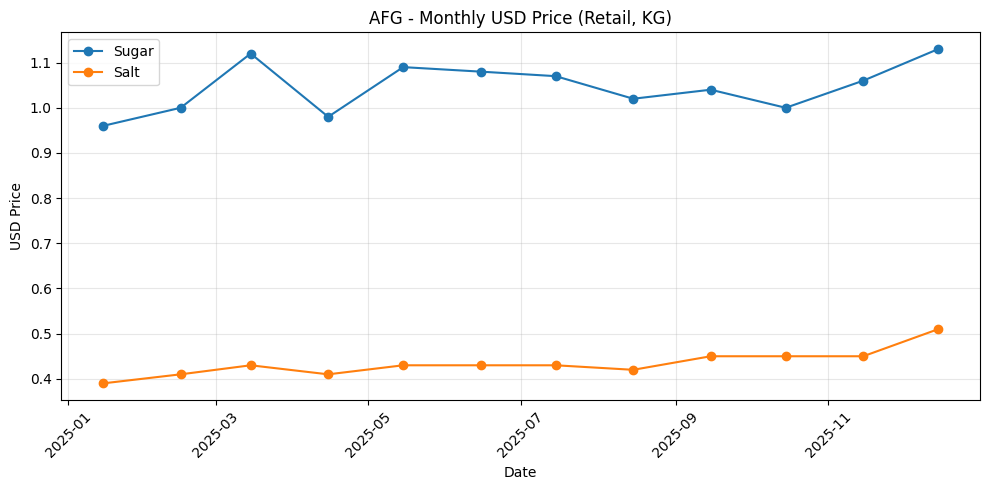

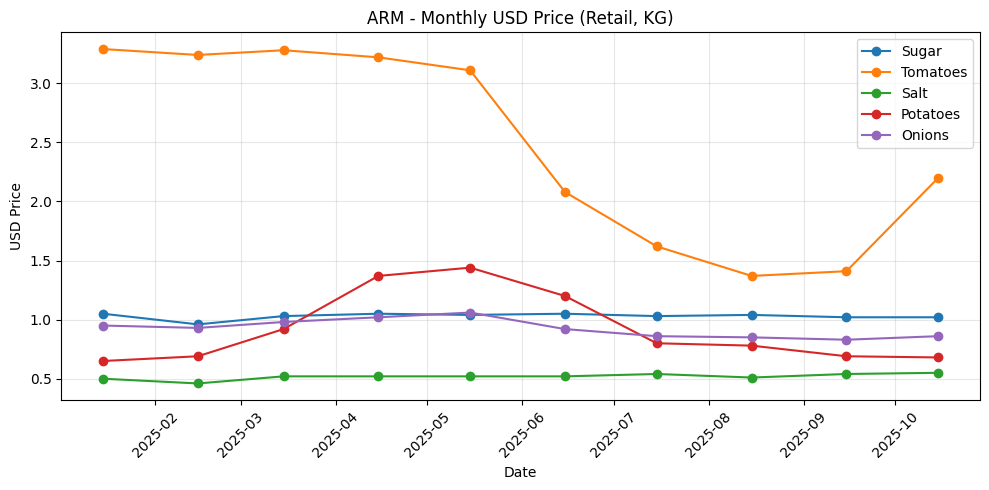

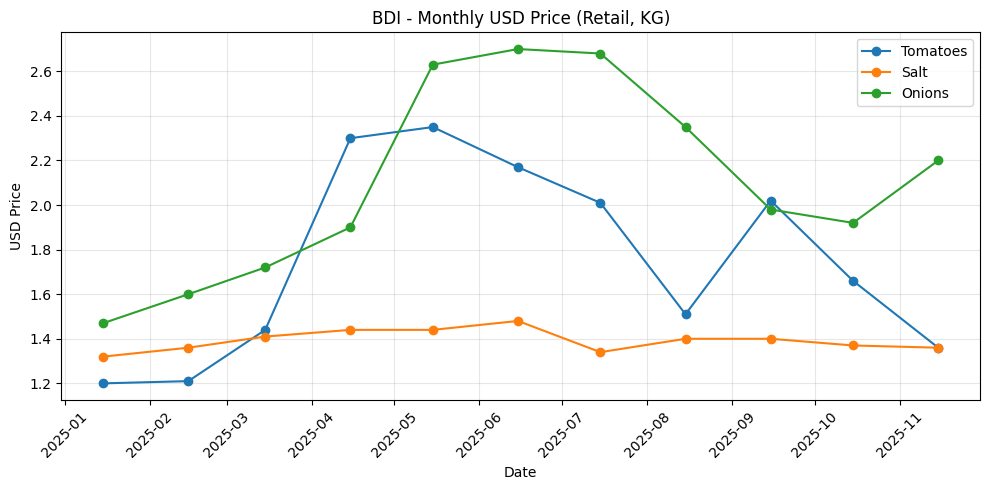

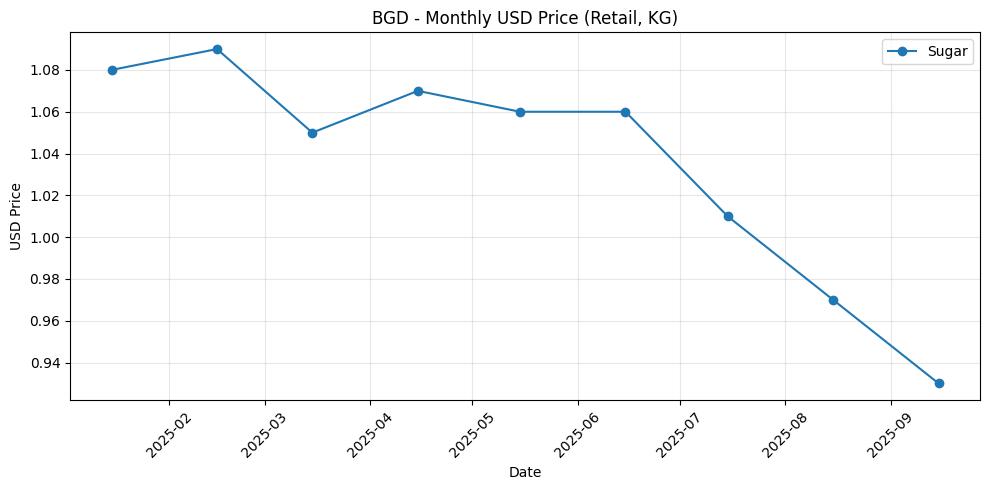

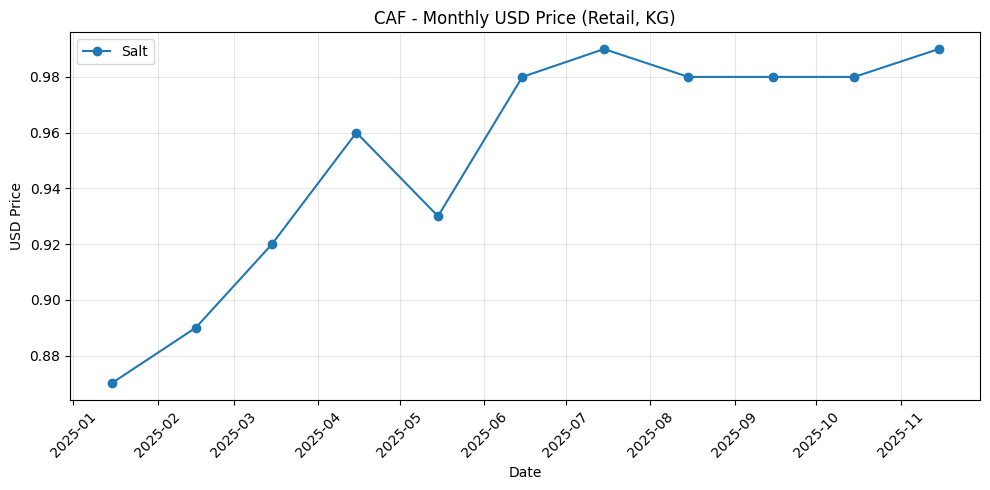

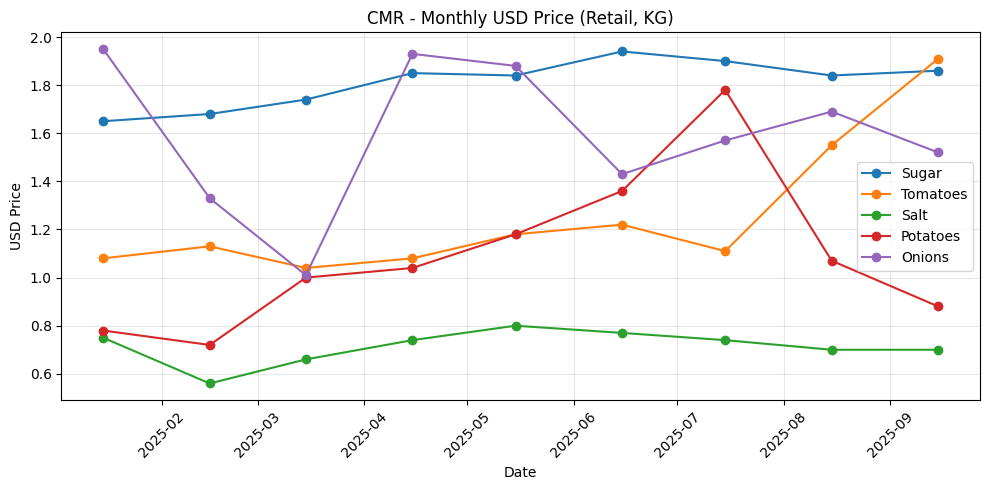

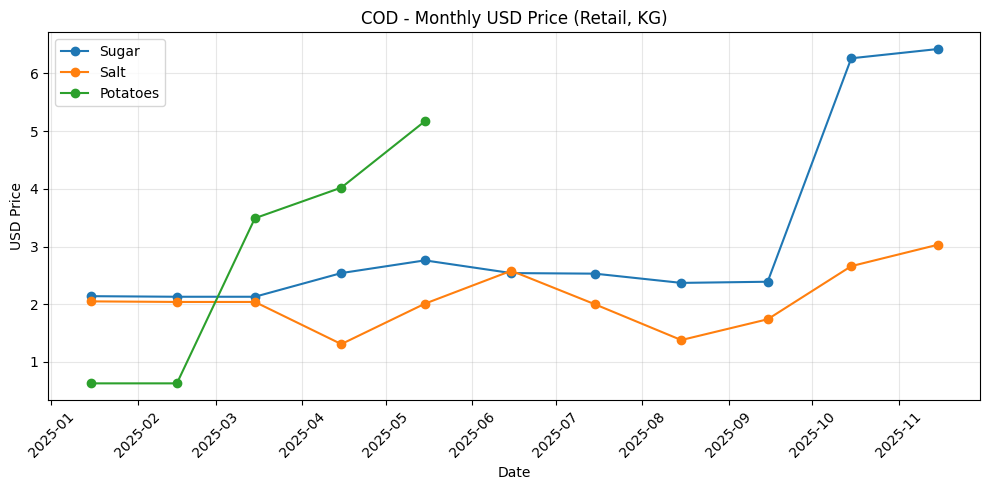

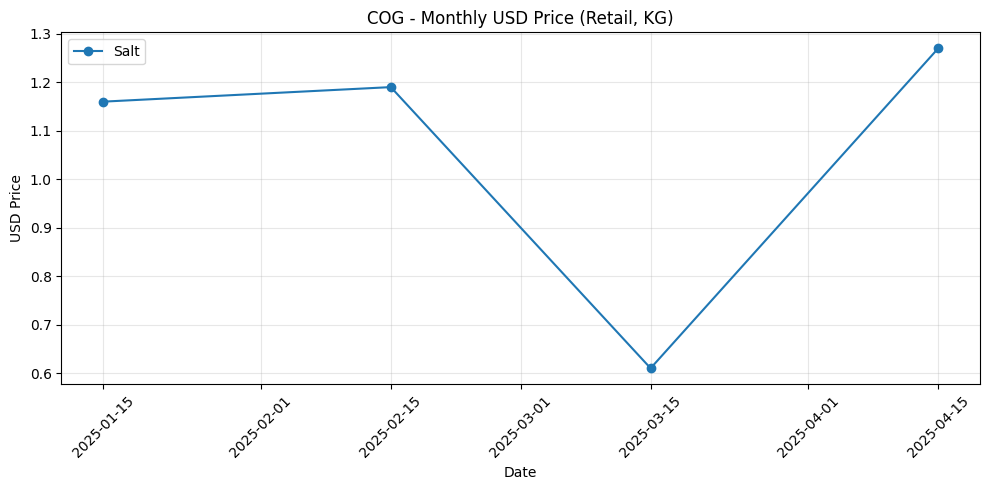

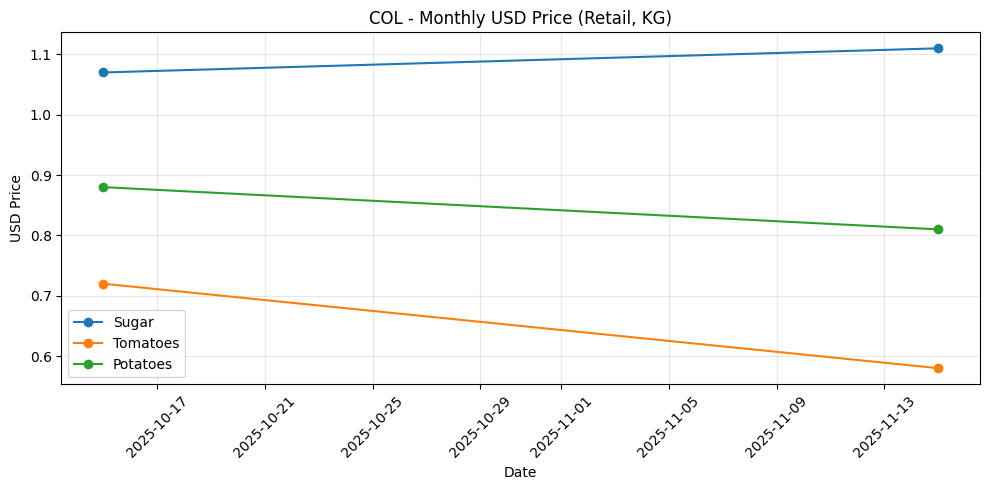

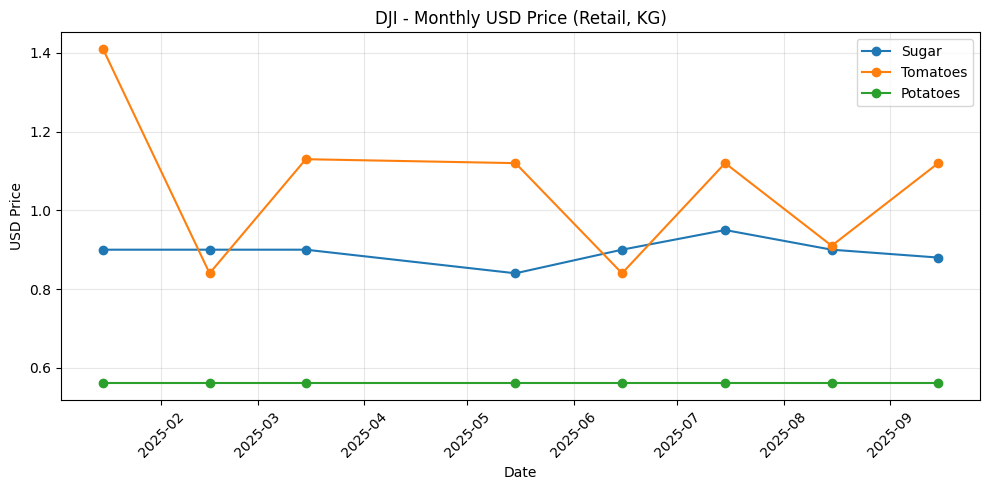

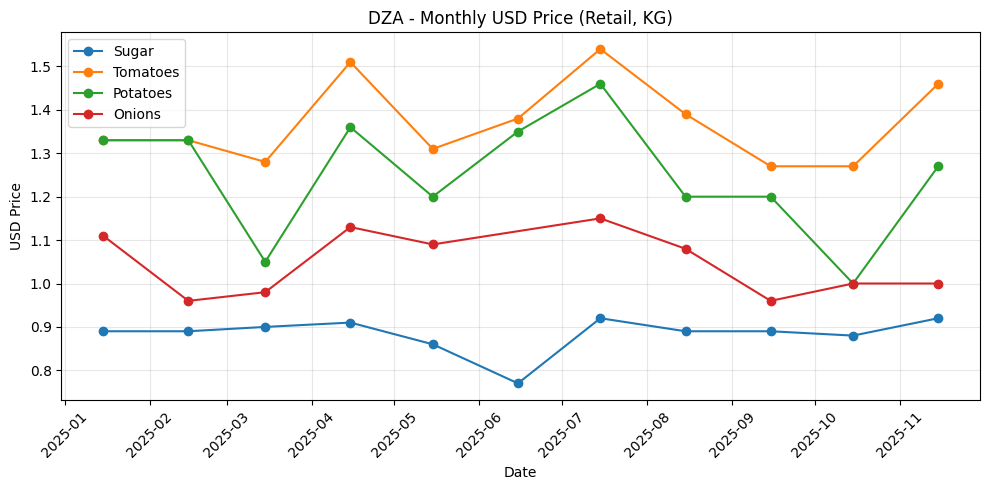

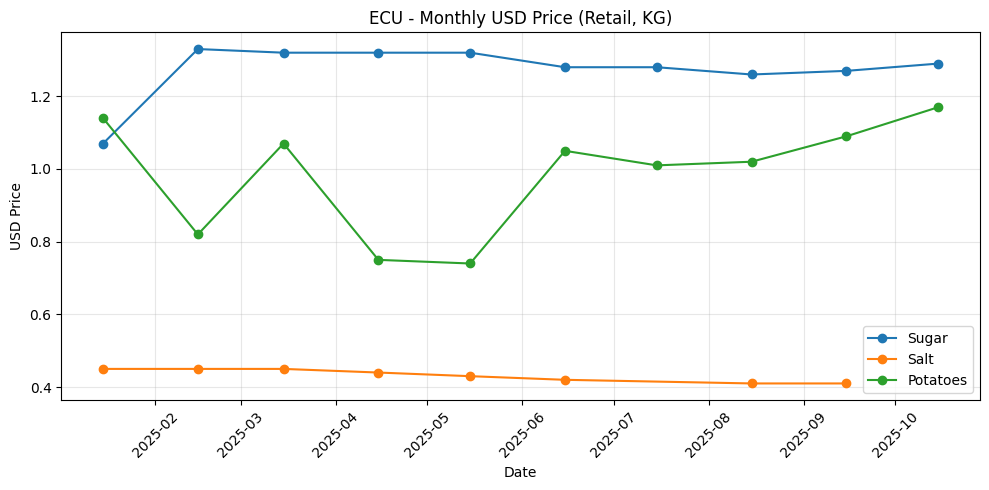

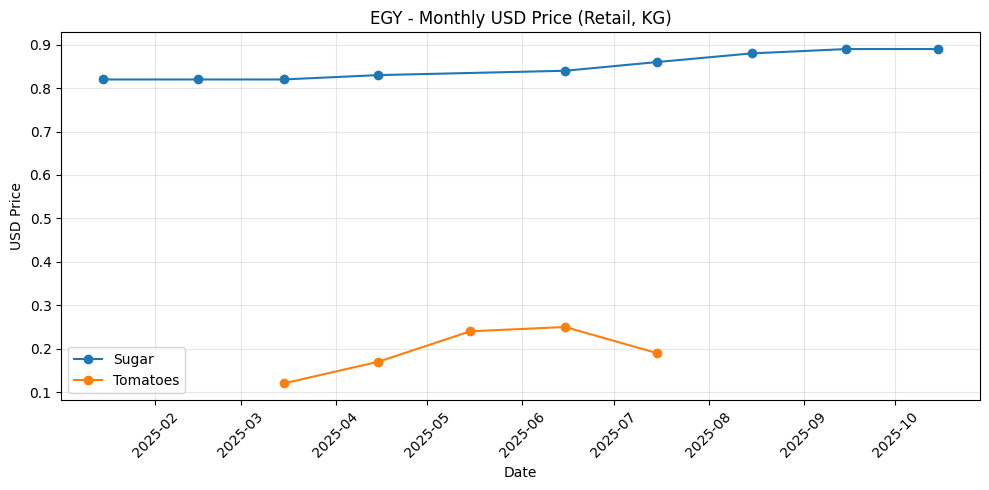

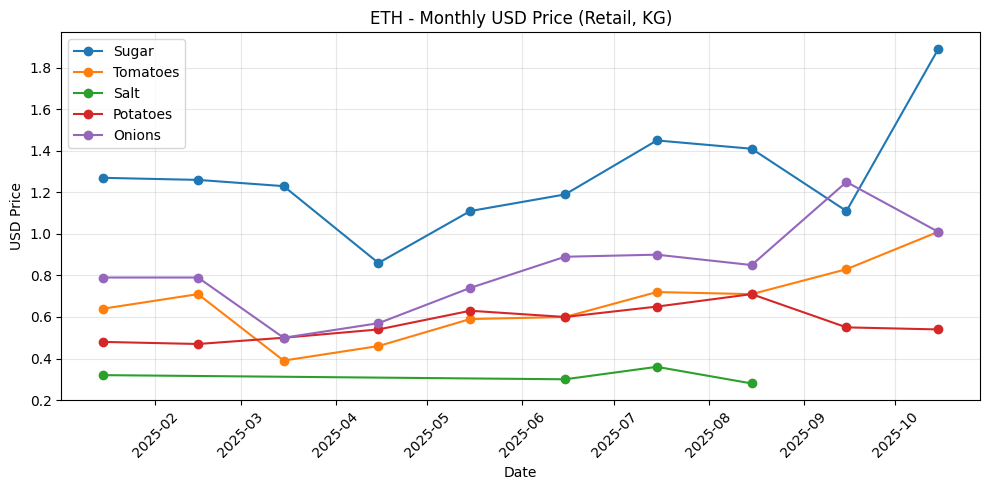

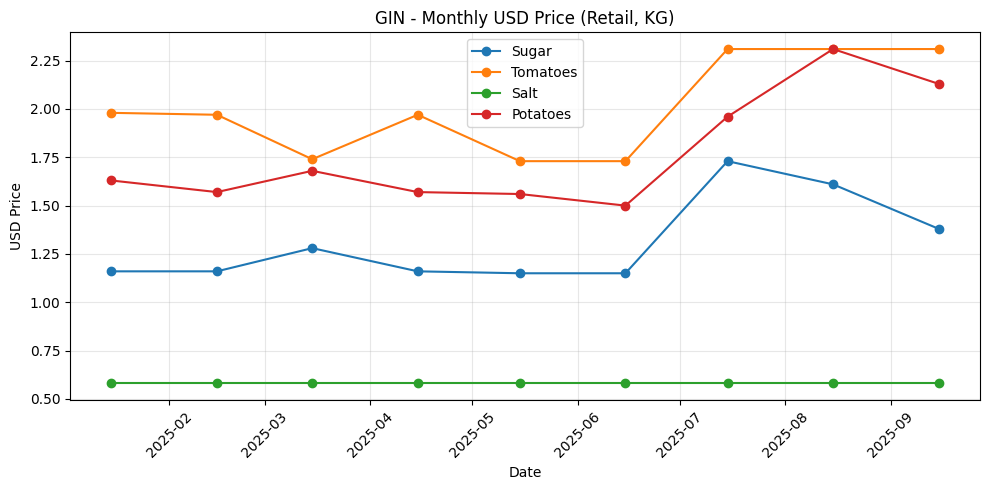

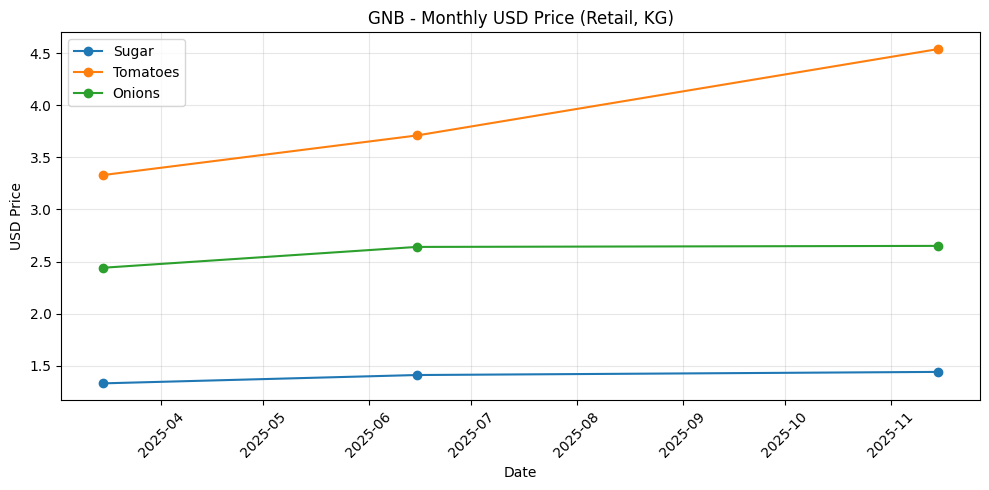

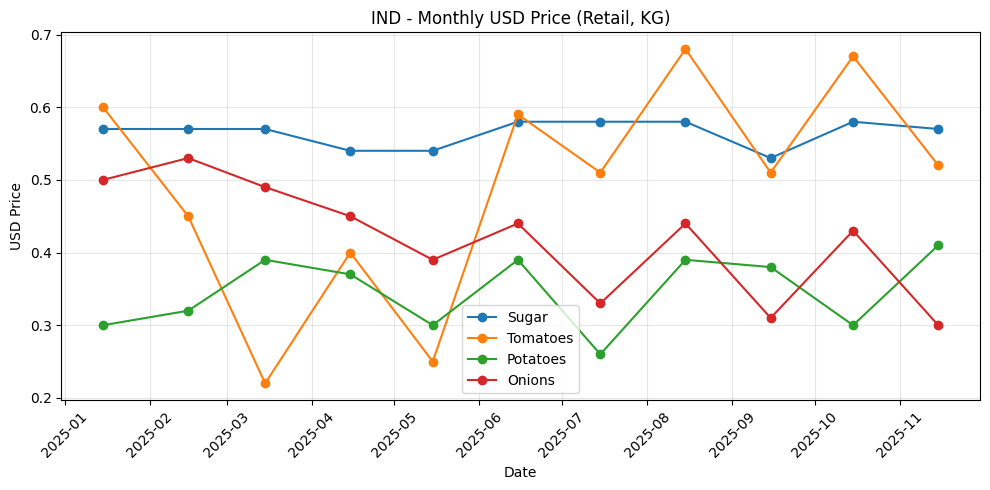

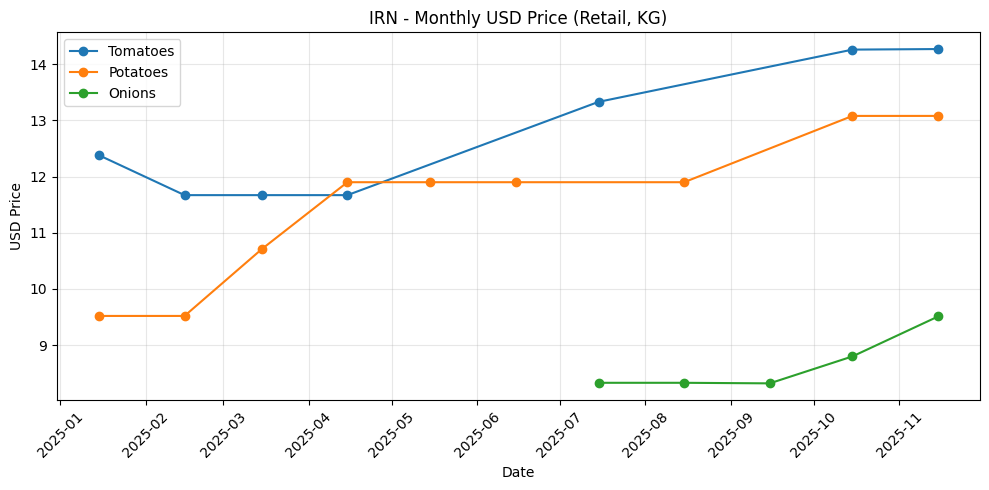

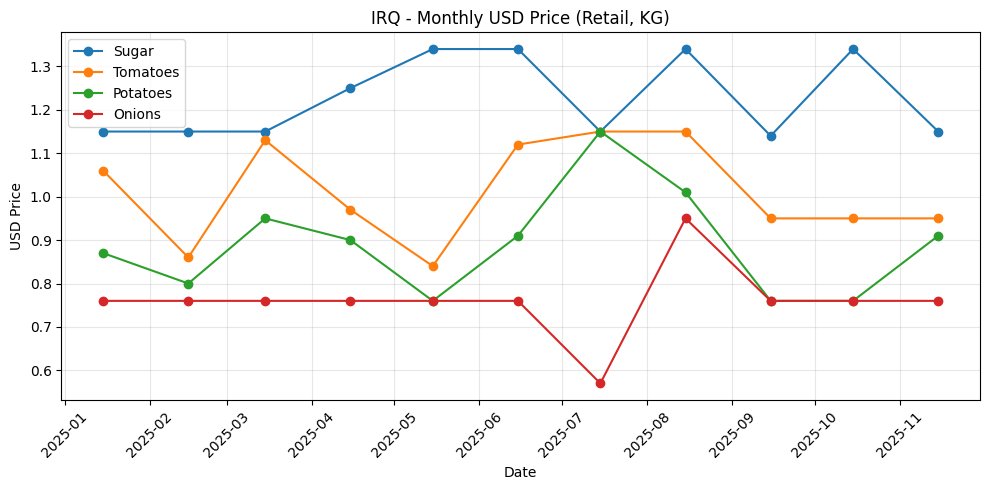

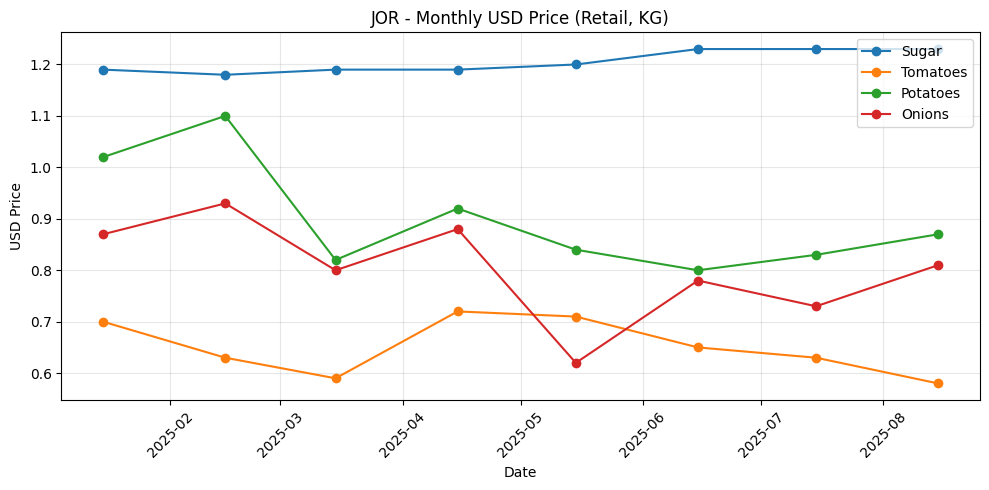

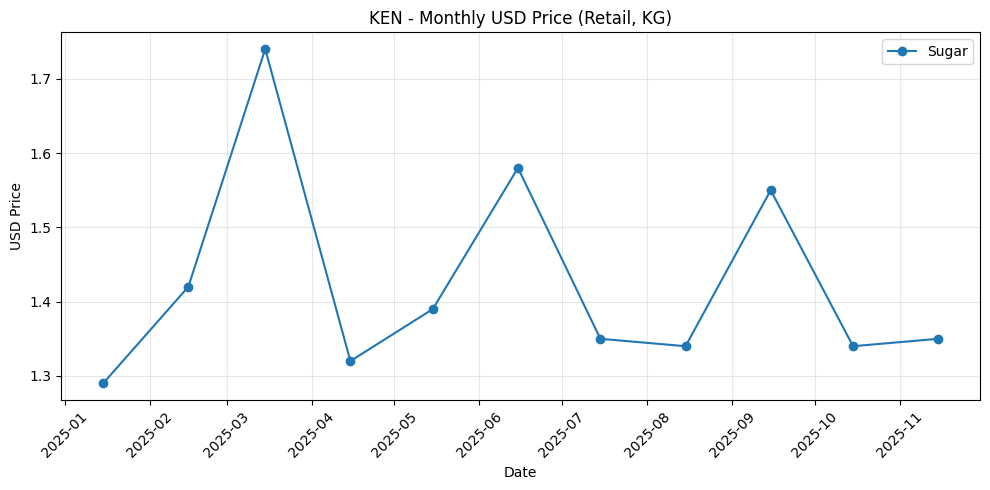

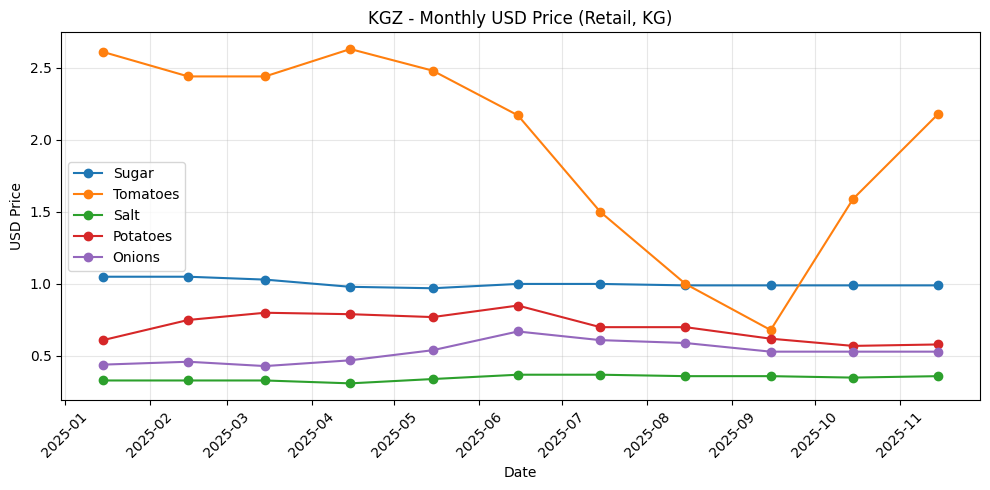

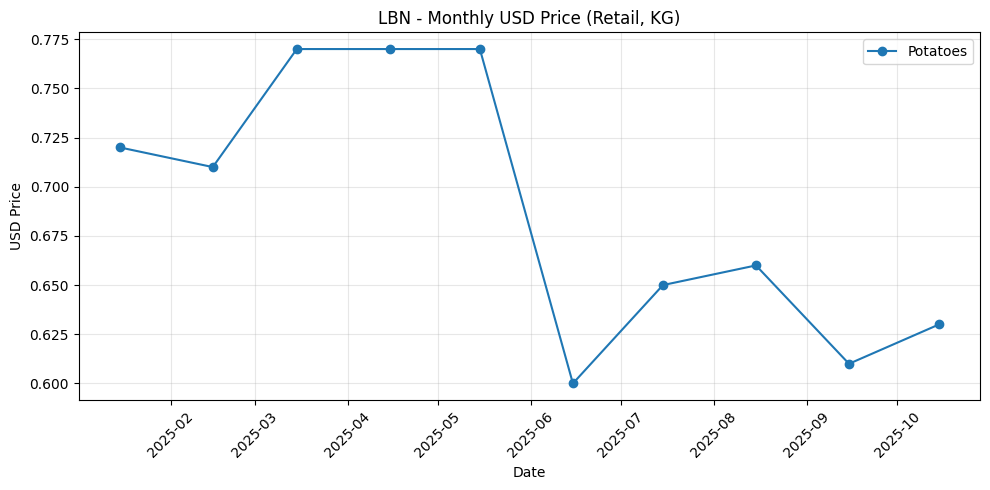

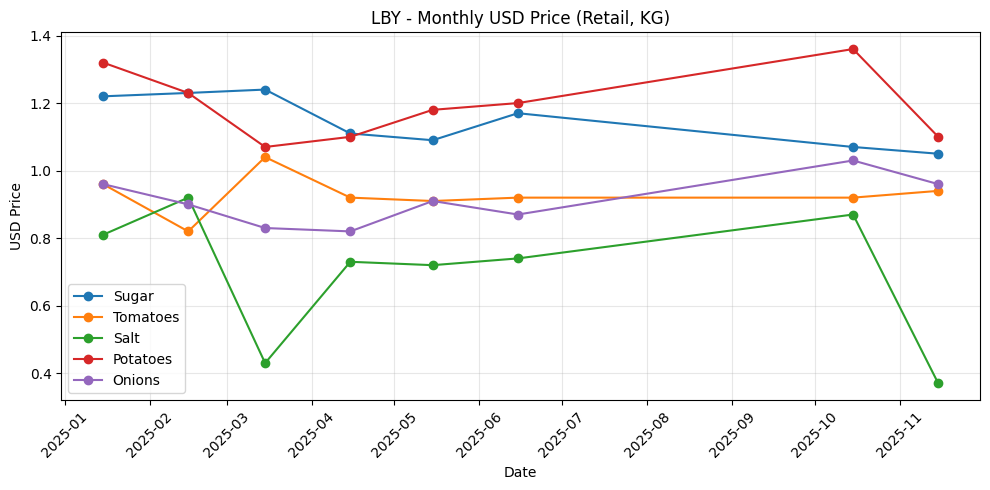

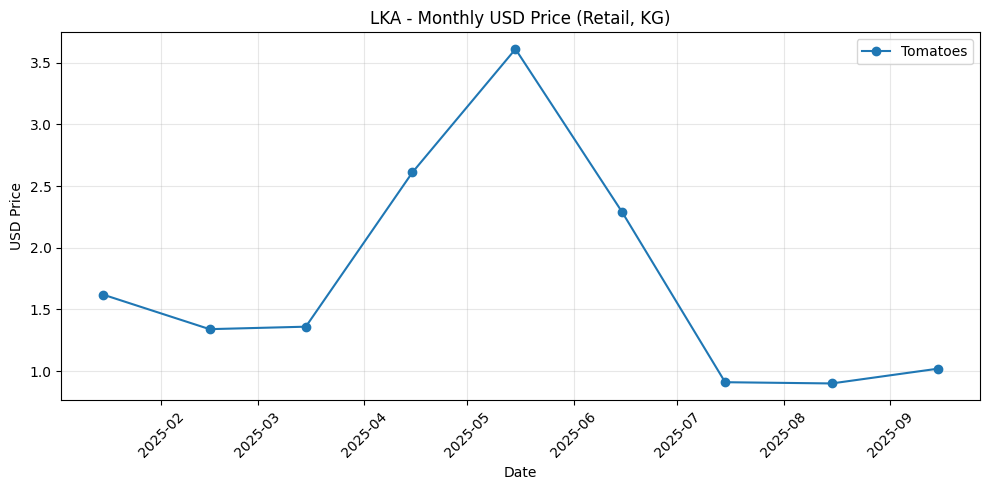

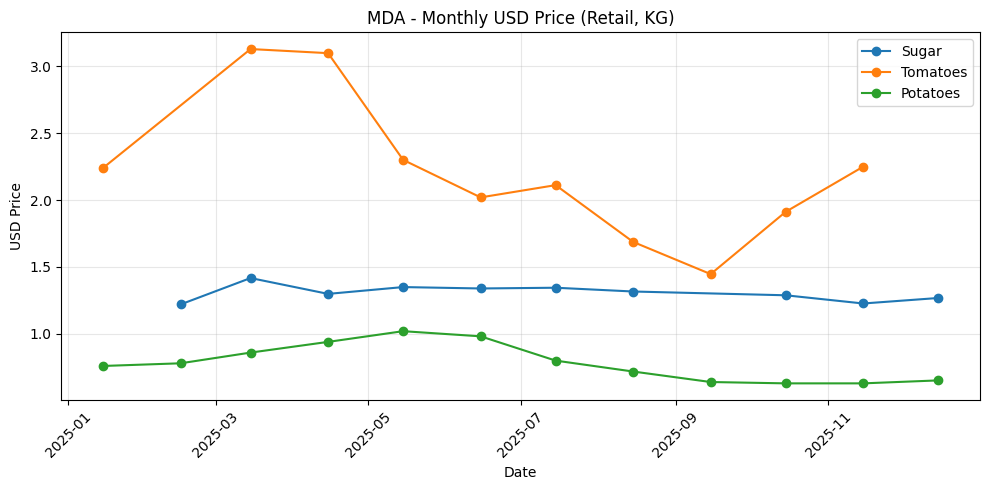

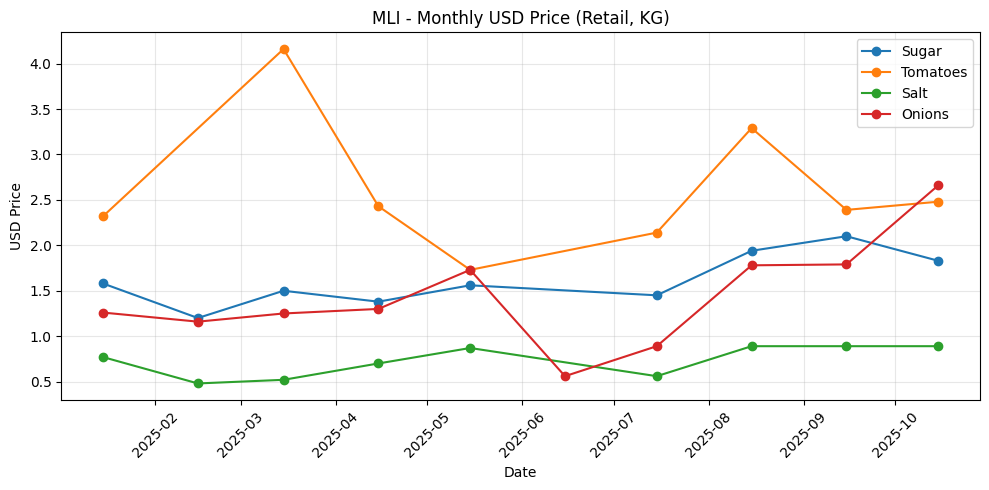

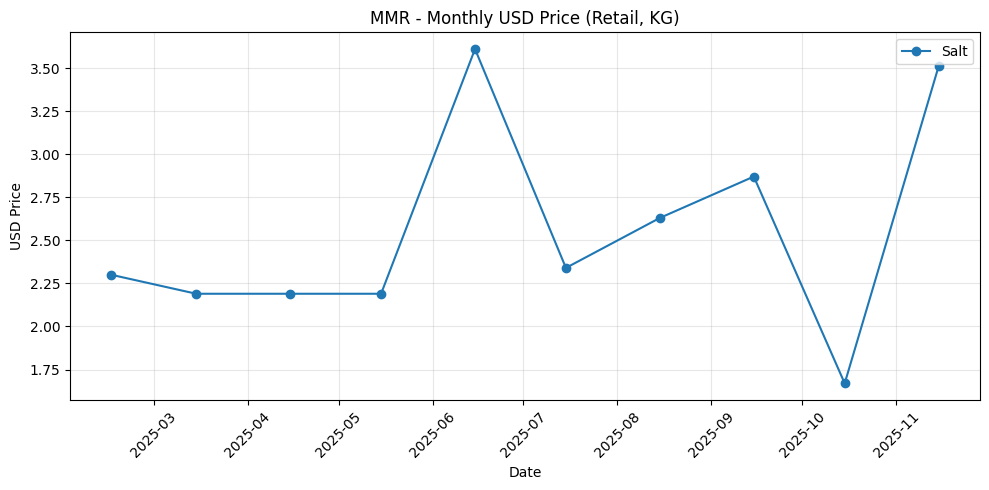

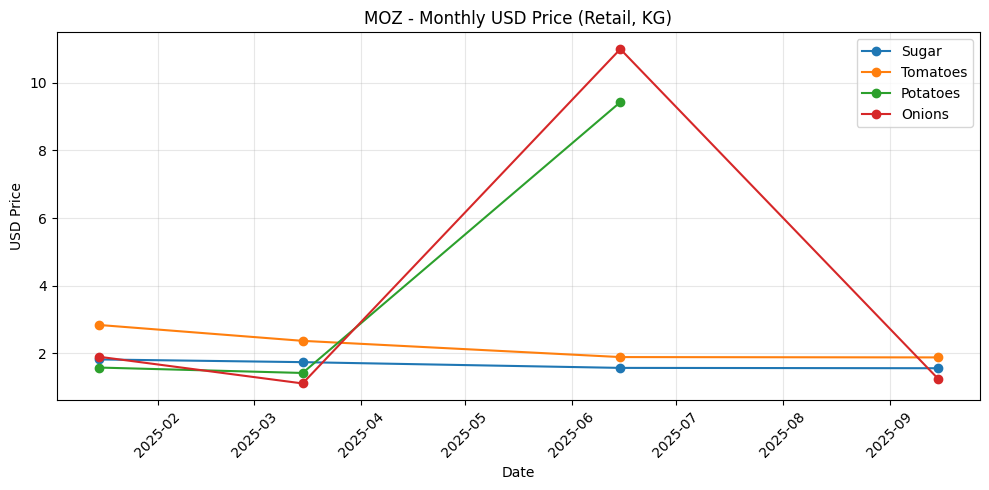

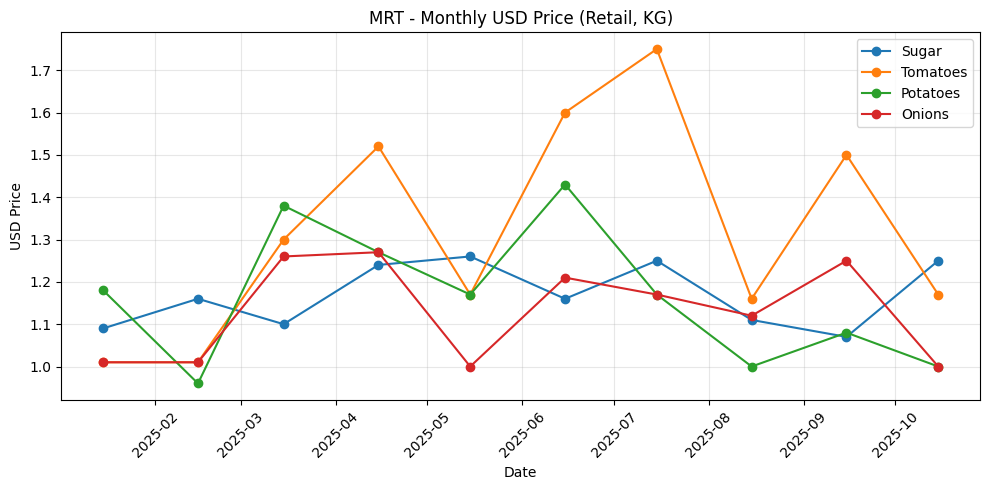

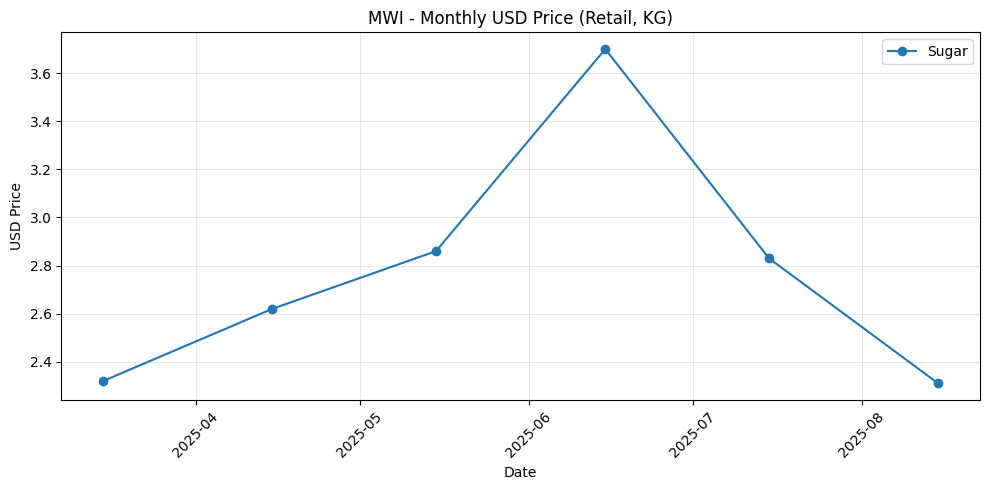

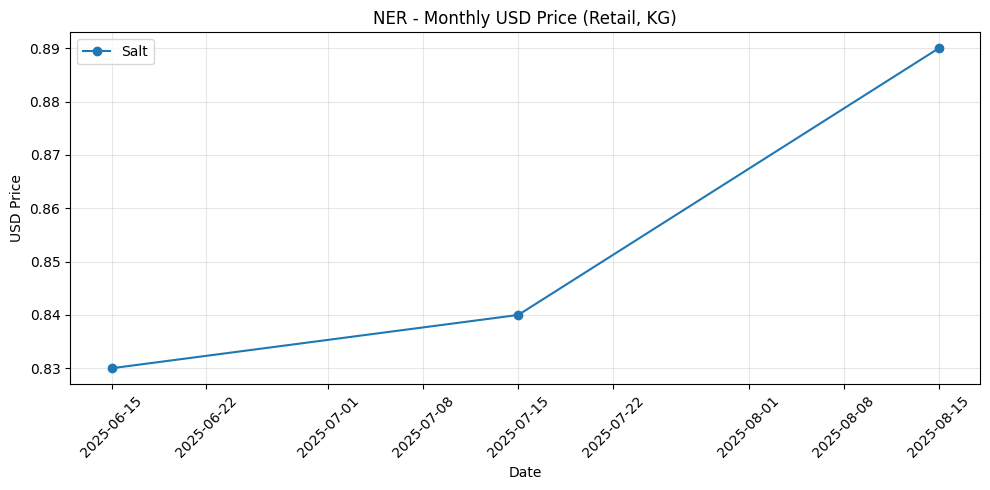

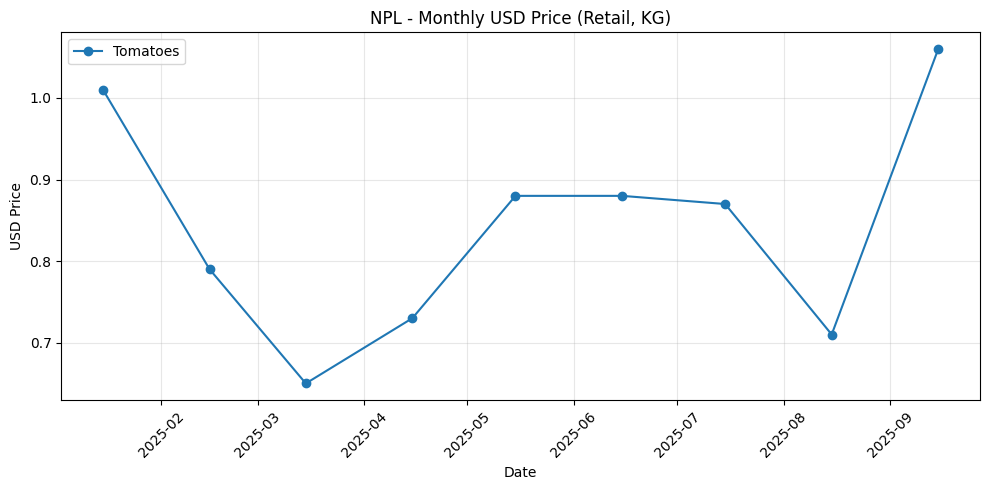

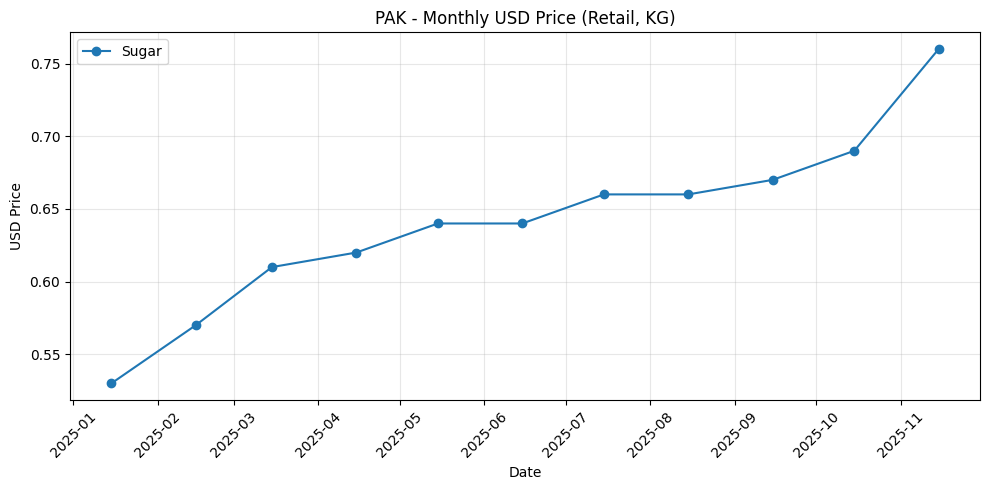

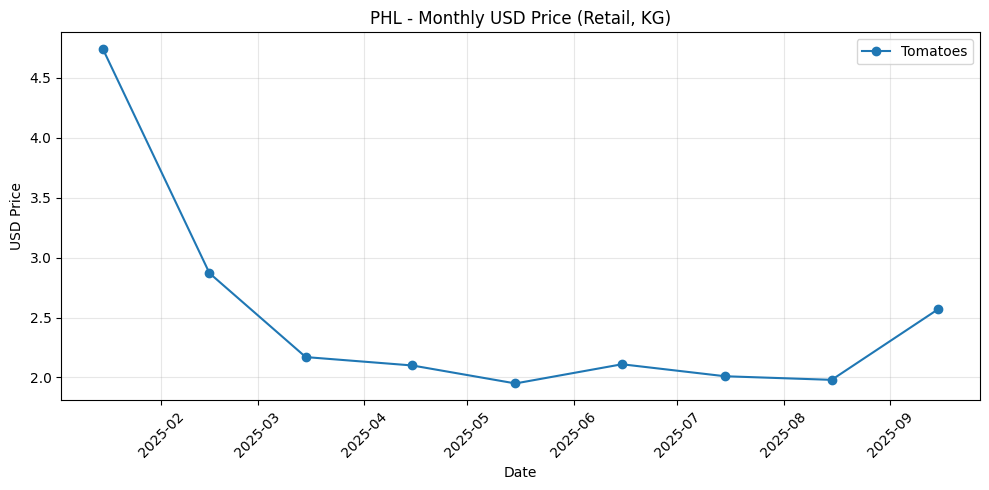

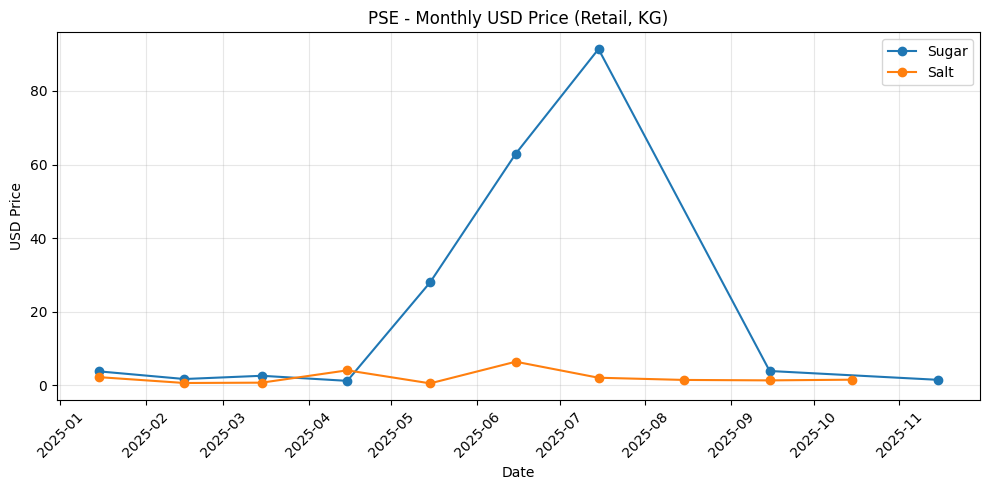

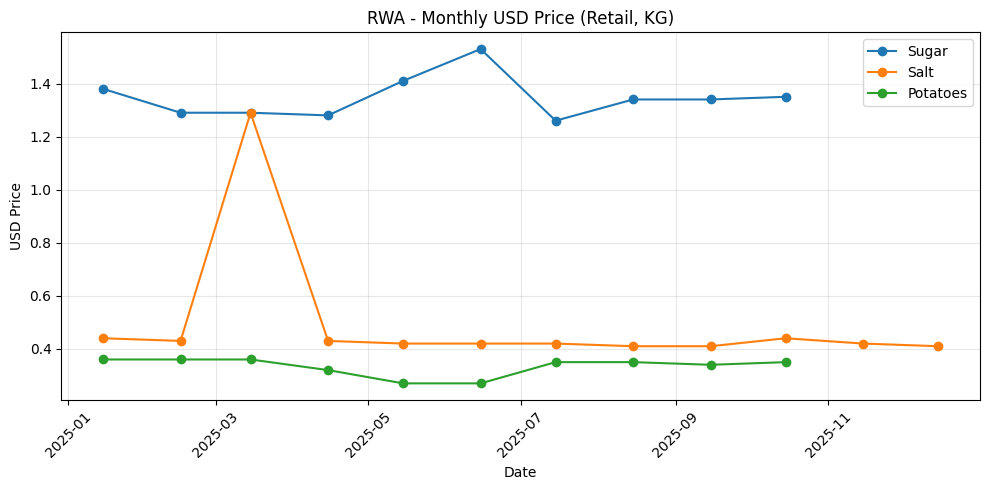

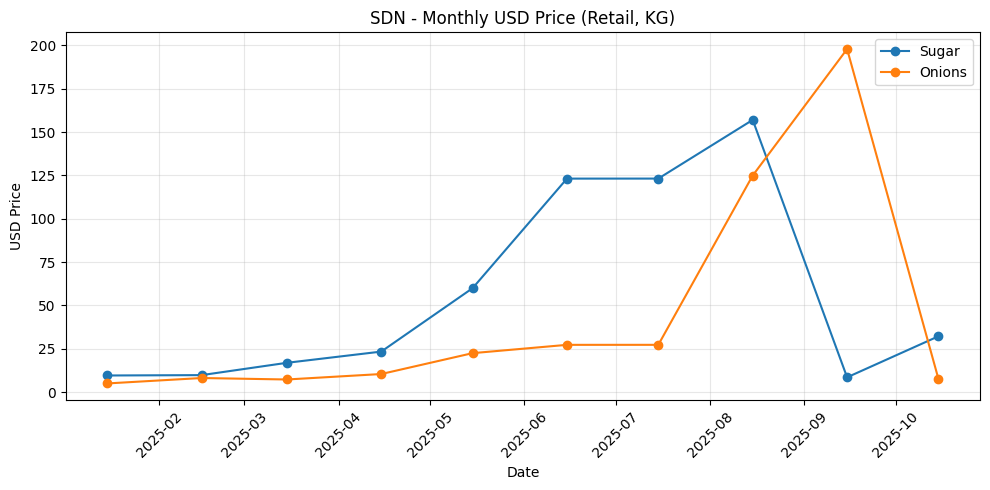

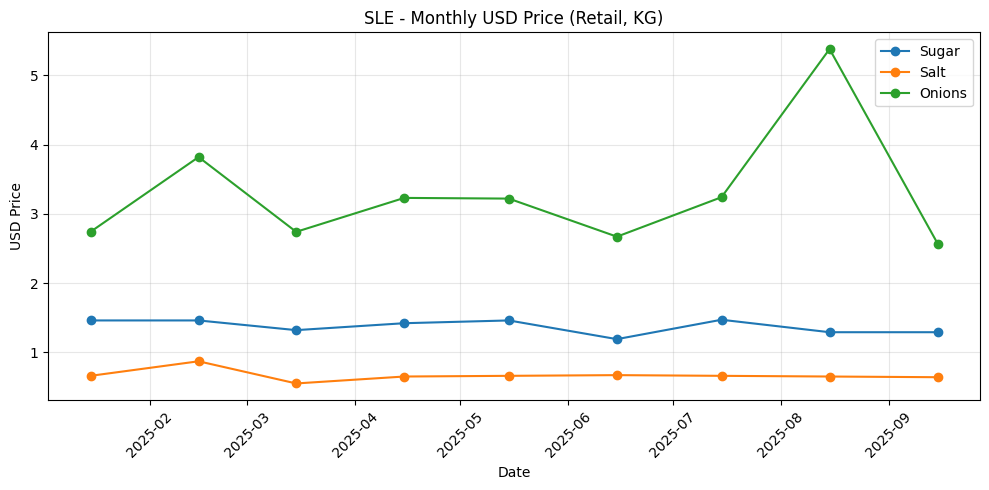

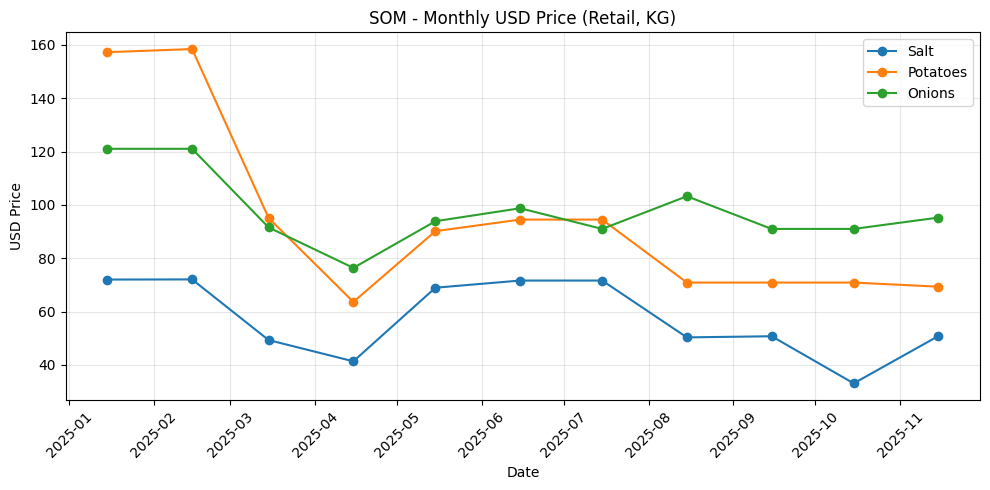

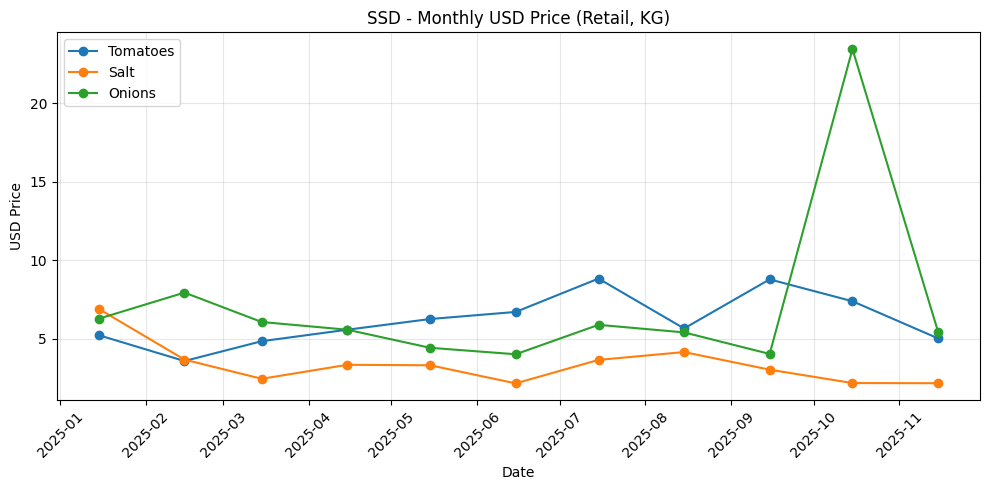

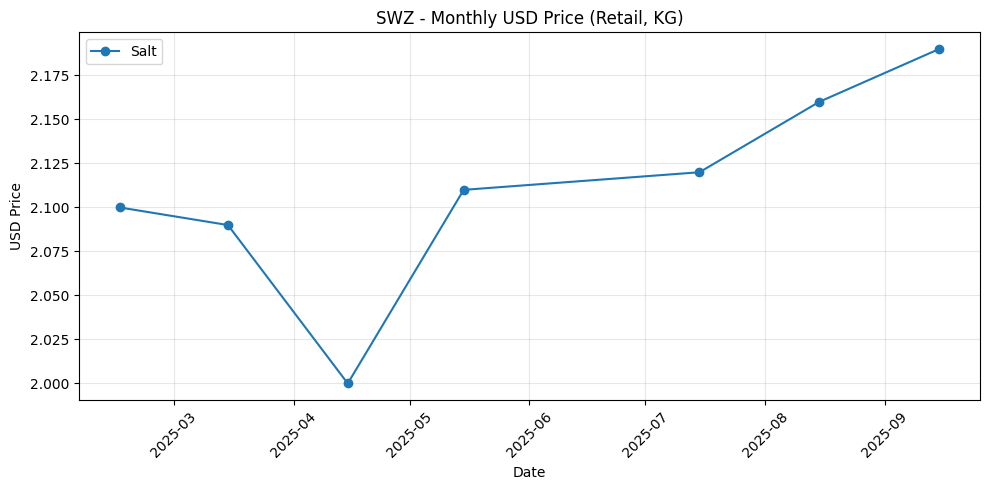

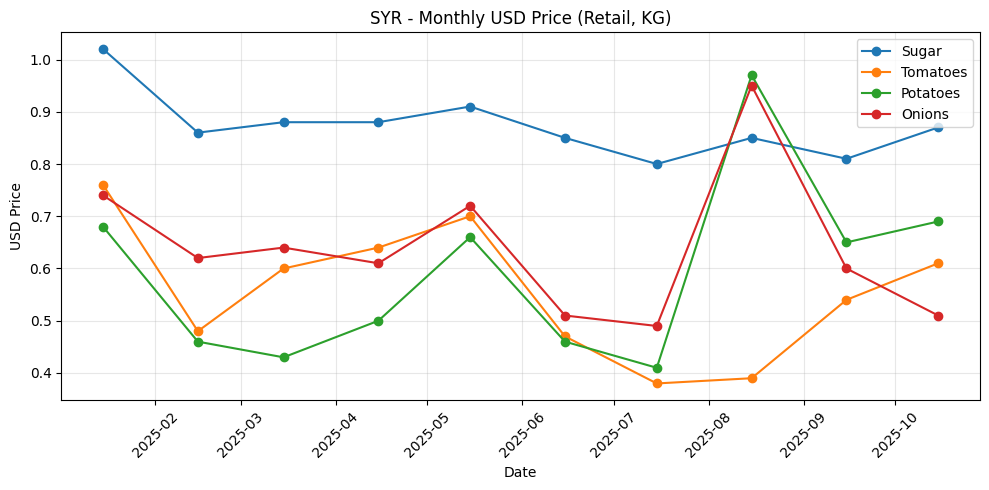

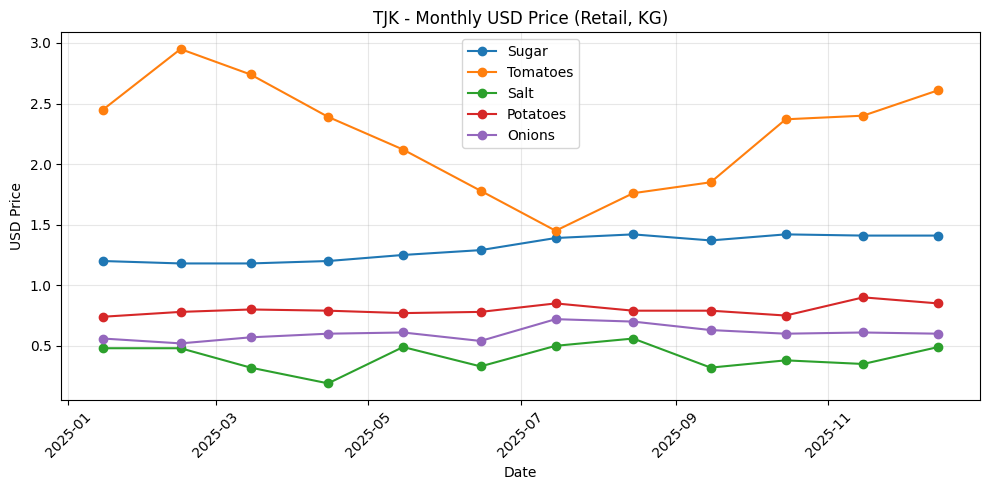

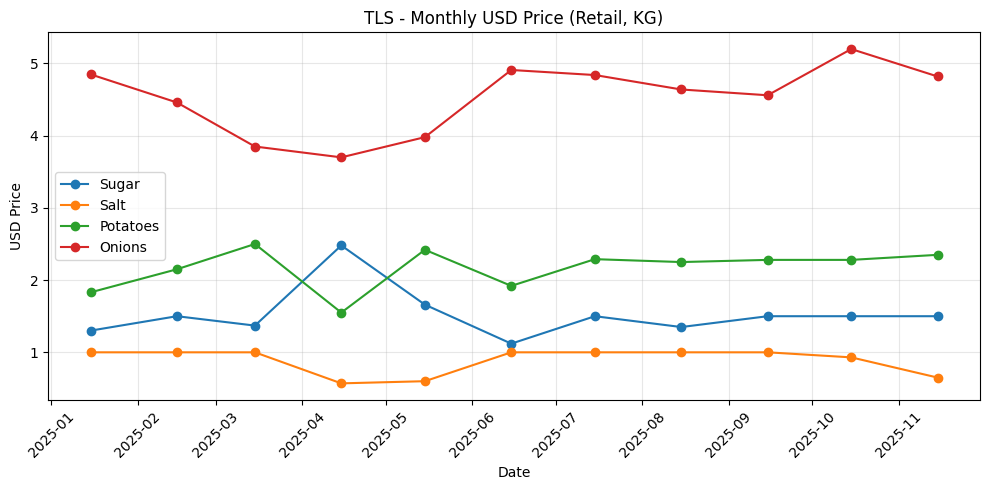

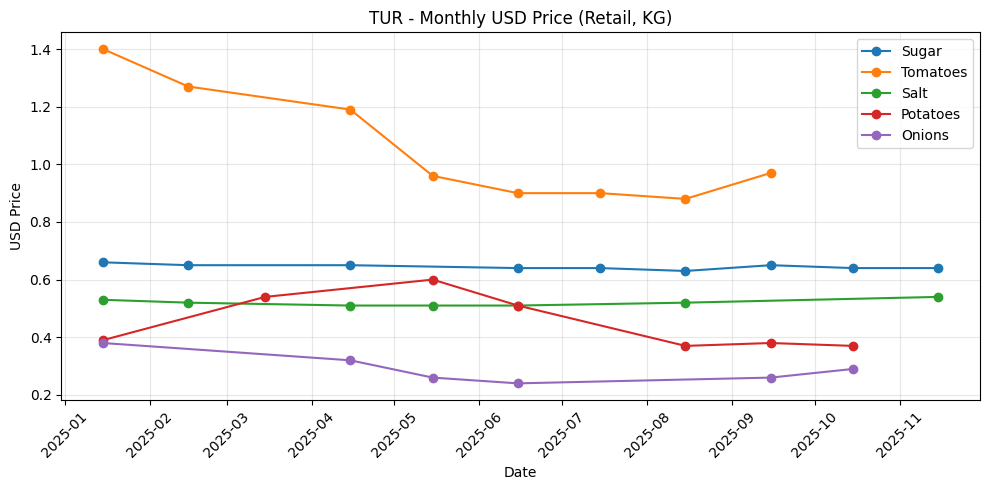

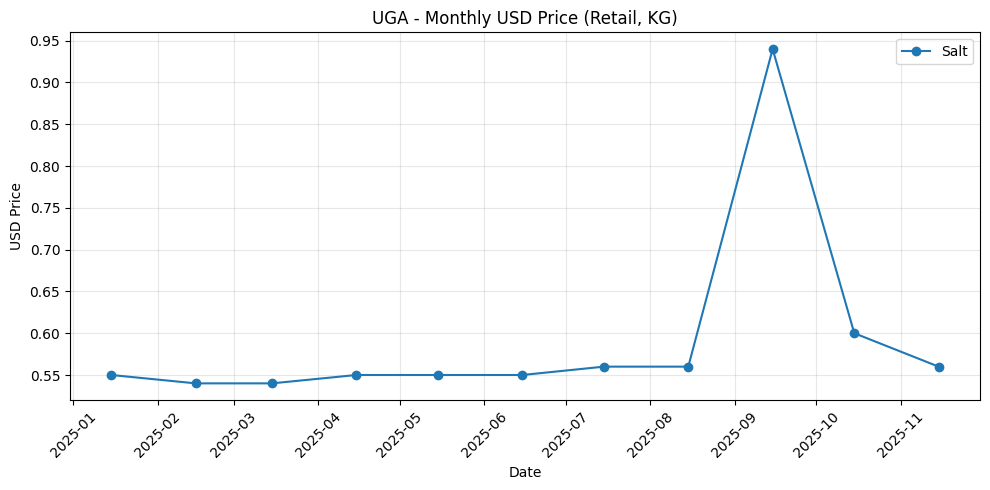

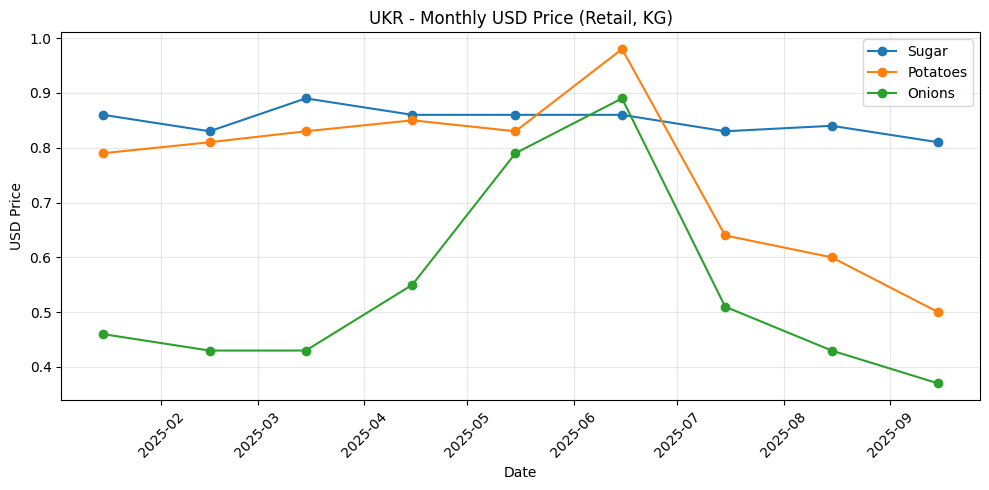

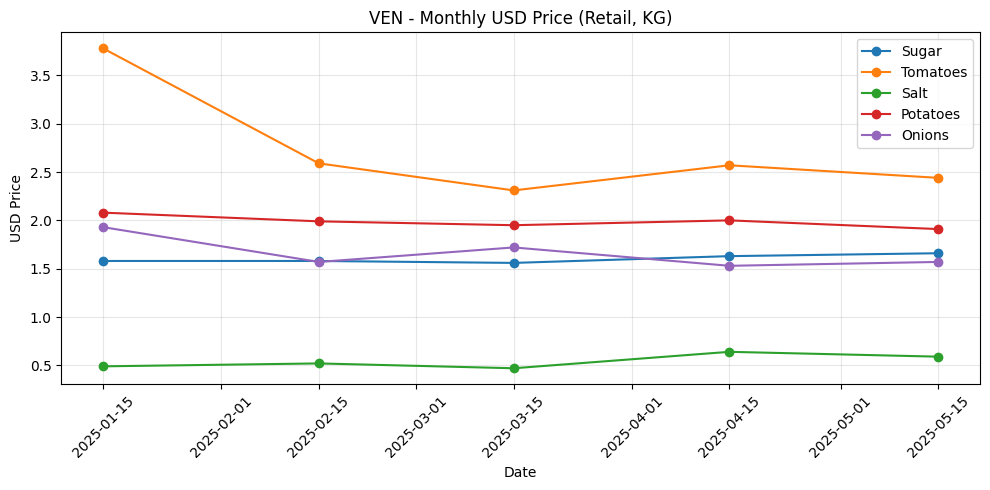

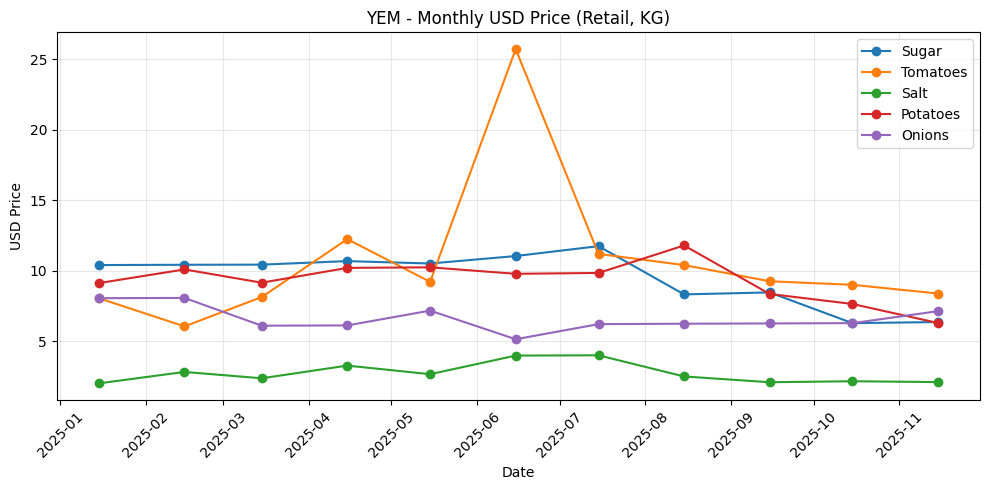

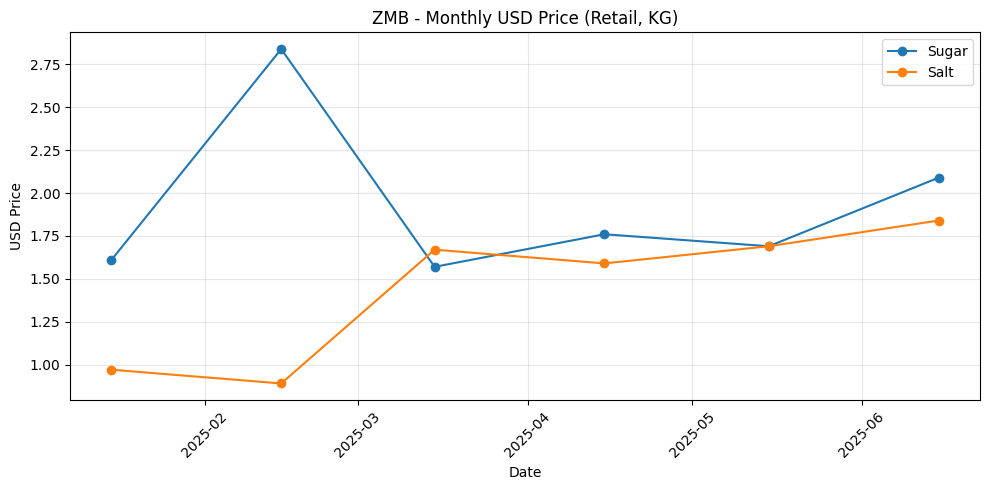

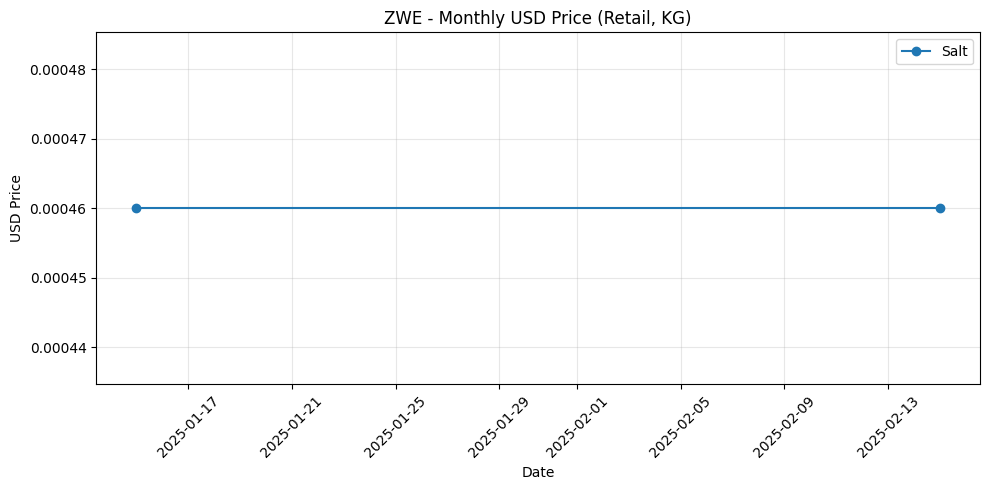

In [134]:
# Harga commodity di masing-masing negara
commodities = ["Sugar","Tomatoes","Salt","Potatoes","Onions"]

agg = (df_new.groupby(["countryiso3","commodity","date"], as_index=False)["usdprice"].max())

countries = agg["countryiso3"].unique()

for c in countries:
    tmp = agg[agg["countryiso3"] == c]

    plt.figure(figsize=(10,5))
    for com in commodities:
        t2 = tmp[tmp["commodity"] == com].sort_values("date")
        if len(t2) == 0:
            continue
        plt.plot(t2["date"], t2["usdprice"], marker="o", label=com)

    plt.title(f"{c} - Monthly USD Price (Retail, KG)")
    plt.xlabel("Date")
    plt.ylabel("USD Price")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Onions di Sudan

In [135]:
# Filter data Sudan dan onions
sdn_onions_mask = (df_new['countryiso3'] == 'SDN') & (df_new['commodity'] == 'Onions')
sdn_onions_data = df_new[sdn_onions_mask]

# Descriptive Statistics sdn_onions_data
sdn_onions_data.describe()

,date,latitude,longitude,price,usdprice,gdp_per_capita_usd
count,134,134.000000,134.000000,134.000000,134.000000,1.340000e+02
mean,2025-05-28 12:00:00,14.288657,30.815896,3930.761194,6.551642,9.846000e+02
min,2025-01-15 00:00:00,11.020000,22.450000,413.000000,0.690000,9.846000e+02
25%,2025-03-15 00:00:00,12.262500,26.150000,1231.250000,2.050000,9.846000e+02
50%,2025-05-15 00:00:00,13.540000,32.540000,1969.500000,3.285000,9.846000e+02
75%,2025-08-15 00:00:00,15.510000,33.970000,3000.000000,5.000000,9.846000e+02
max,2025-10-15 00:00:00,19.620000,37.220000,118750.000000,197.860000,9.846000e+02
std,NaN,2.527332,4.374796,12052.596989,20.079407,2.282269e-12


In [136]:
# Calculate Implied Exchange Rate (Price / USDPrice)
sdn_onions_data['implied_rate'] = sdn_onions_data['price'] / sdn_onions_data['usdprice']

# Filter for months around Aug/Sept (July - Oct) to see trend
trend_mask = (sdn_onions_data['date'].dt.month >= 7) & (sdn_onions_data['date'].dt.month <= 10)
sdn_trend = sdn_onions_data[trend_mask].sort_values('date')

print("--- Data Onions (KG) di Sudan (Jul - Okt 2025) ---")
print(sdn_trend[['date', 'market', 'price', 'usdprice', 'implied_rate']].sort_values('usdprice', ascending=False).head(10))

# Check if Implied Rate is stable
print("\n--- Statistik Implied Rate (Kurs) ---")
print(sdn_trend.groupby('date')[['price', 'usdprice', 'implied_rate']].mean())

--- Data Onions (KG) di Sudan (Jul - Okt 2025) ---
             date     market     price  usdprice  implied_rate
148771 2025-09-15  Al Fashir  118750.0    197.86    600.171839
148623 2025-08-15  Al Fashir   75000.0    124.92    600.384246
148462 2025-07-15  Al Fashir   16375.0     27.28    600.256598
148818 2025-09-15    Kadugli    9000.0     15.00    600.000000
148721 2025-09-15    Damazin    6875.0     11.46    599.912740
148516 2025-07-15    Kadugli    5500.0      9.16    600.436681
148564 2025-08-15    Damazin    5000.0      8.33    600.240096
148965 2025-10-15    El Fula    4575.0      7.62    600.393701
148930 2025-10-15      Singa    4250.0      7.08    600.282486
148882 2025-10-15    Kassala    4000.0      6.66    600.600601

--- Statistik Implied Rate (Kurs) ---
                   price   usdprice  implied_rate
date                                             
2025-07-15   3151.000000   5.249286    600.359404
2025-08-15   7844.692308  13.065385    600.530351
2025-09-15  11329

/tmp/ipython-input-2780260491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdn_onions_data['implied_rate'] = sdn_onions_data['price'] / sdn_onions_data['usdprice']


Kenaikan harga hanya terjadi di market **Al Fashir** yang berada di ibu kota Darfur Utara (`zona konflik aktif`). Kenaikan harga dari `$27` (Juli) ke `$197` (September) terjadi karena ada **konflik pengepungan** sehingga **jalur logistik terputus total**. Barang jadi sangat **langka** sehingga **harganya melonjak**.

## Cek data duplikat

In [137]:
key_cols = ["countryiso3","date","market_id","commodity_id","unit","pricetype","currency","priceflag"]
dup_key = df_new.duplicated(subset=key_cols).sum()
print("Duplikat berdasarkan key:", dup_key)

Duplikat berdasarkan key: 0


In [53]:
duplicates = df_new.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

Jumlah baris duplikat: 0


## Visualisasi

/tmp/ipython-input-1864424277.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new, y='category', order=df_new['category'].value_counts().index, palette='viridis')


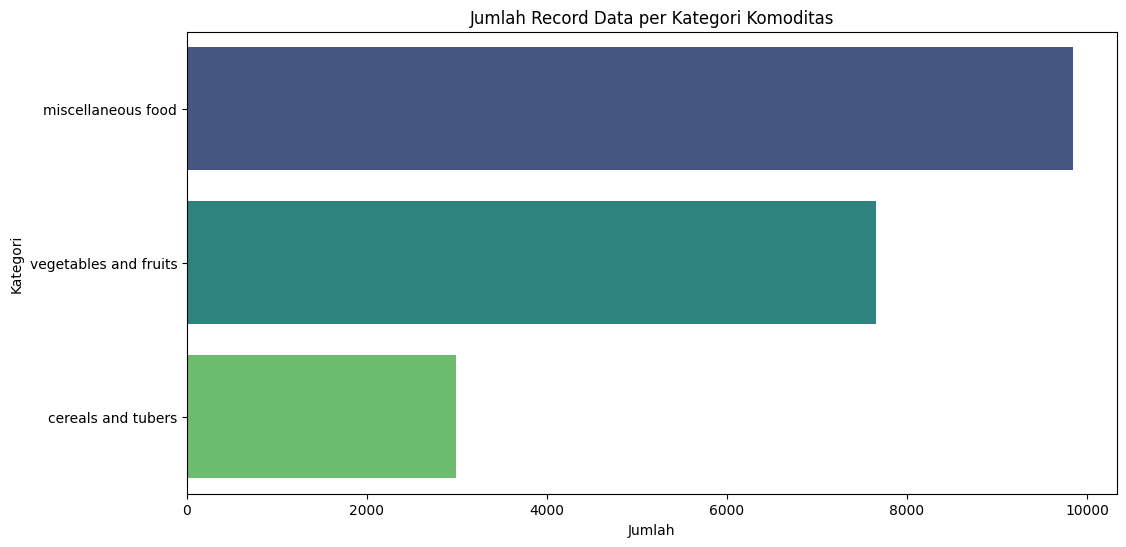

In [138]:
# Jumlah Data per Kategori
plt.figure(figsize=(12, 6))
sns.countplot(data=df_new, y='category', order=df_new['category'].value_counts().index, palette='viridis')
plt.title('Jumlah Record Data per Kategori Komoditas')
plt.xlabel('Jumlah')
plt.ylabel('Kategori')
plt.show()

/tmp/ipython-input-2591231554.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_new[df_new['commodity'].isin(top_com)], y='commodity', order=top_com, palette='magma')


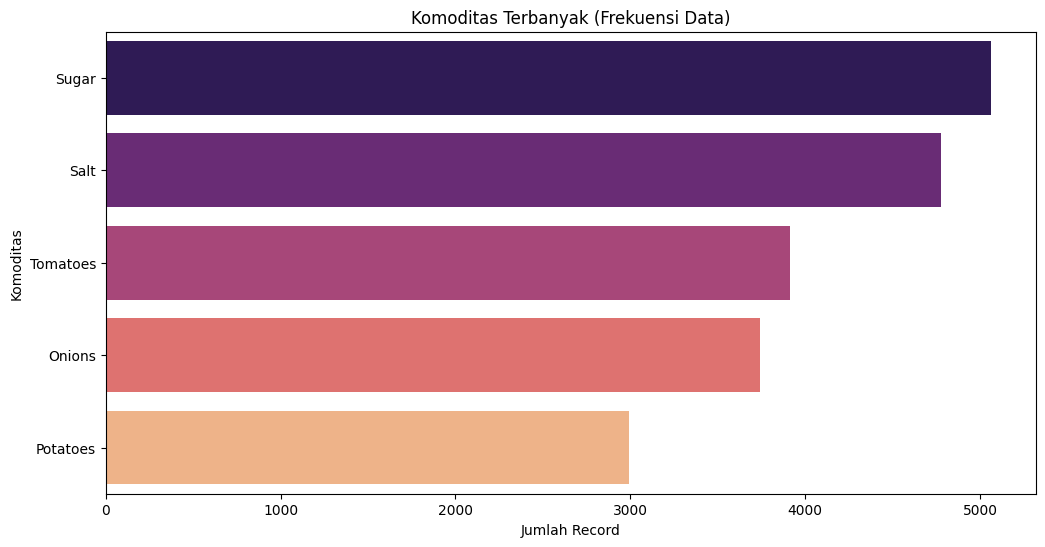

In [139]:
# Komoditas yang paling sering muncul
plt.figure(figsize=(12, 6))
top_com = df_new['commodity'].value_counts().index
sns.countplot(data=df_new[df_new['commodity'].isin(top_com)], y='commodity', order=top_com, palette='magma')
plt.title('Komoditas Terbanyak (Frekuensi Data)')
plt.xlabel('Jumlah Record')
plt.ylabel('Komoditas')
plt.show()

---


# V. Save data to CSV

In [141]:
df_new.to_csv("cleaned_wfp_2025.csv", index=False)